In [3]:
from google.colab import files
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\n13,0,3,"Saundercock, Mr

In [2]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at: inproc://172.28.0.12/618/1
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:8787/status
INFO:distributed.worker:      Start worker at: inproc://172.28.0.12/618/4
INFO:distributed.worker:         Listening to:          inproc172.28.0.12
INFO:distributed.worker:          Worker name:                          0
INFO:distributed.worker:         dashboard at:          172.28.0.12:42919
INFO:distributed.worker:Waiting to connect to: inproc://172.28.0.12/618/1
INFO:distributed.worker:-------------------------------------------------
INFO:distributed.worker:              Threads:                          4
INFO:distributed.worker:               Memory:                   1.86 GiB
INFO:distributed.worker:      Local Directory: /tmp/dask-scratch-space/wo

<Client: 'inproc://172.28.0.12/618/1' processes=1 threads=4, memory=1.86 GiB>

In [4]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [5]:

import dask.dataframe as dd
import pandas as pd

In [6]:
df = dd.read_csv('/content/titanic.csv')

In [7]:
df=df.dropna()
for i in df.columns:
  if  pd.api.types.is_numeric_dtype(df[i]):
    df[i]=df[i].fillna(df[i].mean())

In [8]:
for i in df.columns:
  if  pd.api.types.is_numeric_dtype(df[i]):
    print("Max of ",i,"  is: ",df[i].max().compute() )


    print("Min of ",i,"  is: ",df[i].min().compute())


    print("Mean of ",i,"  is: ",df[i].mean().compute() )


    print("Std of ",i,"  is: ",df[i].std().compute() )


Max of  PassengerId   is:  890
Min of  PassengerId   is:  2
Mean of  PassengerId   is:  455.3661202185792
Std of  PassengerId   is:  247.05247551692415
Max of  Survived   is:  1
Min of  Survived   is:  0
Mean of  Survived   is:  0.6721311475409836
Std of  Survived   is:  0.4707246509282609
Max of  Pclass   is:  3
Min of  Pclass   is:  1
Mean of  Pclass   is:  1.1912568306010929
Std of  Pclass   is:  0.5151869975715835
Max of  Age   is:  80.0
Min of  Age   is:  0.92
Mean of  Age   is:  35.6744262295082
Std of  Age   is:  15.643865966849717
Max of  SibSp   is:  3
Min of  SibSp   is:  0
Mean of  SibSp   is:  0.4644808743169399
Std of  SibSp   is:  0.6441585604537323
Max of  Parch   is:  4
Min of  Parch   is:  0
Mean of  Parch   is:  0.47540983606557374
Std of  Parch   is:  0.7546170860086108
Max of  Fare   is:  512.3292
Min of  Fare   is:  0.0
Mean of  Fare   is:  78.68246885245901
Std of  Fare   is:  76.3478427004057


In [9]:
df.describe(include='all').head(20)

PassengerId    Survived      Pclass                           Name  \
unique          NaN         NaN         NaN                            183   
count    183.000000  183.000000  183.000000                            183   
top             NaN         NaN         NaN  Allen, Miss. Elisabeth Walton   
freq            NaN         NaN         NaN                              1   
mean     455.366120    0.672131    1.191257                            NaN   
std      247.052476    0.470725    0.515187                            NaN   
min        2.000000    0.000000    1.000000                            NaN   
25%      263.500000    0.000000    1.000000                            NaN   
50%      457.000000    1.000000    1.000000                            NaN   
75%      676.000000    1.000000    1.000000                            NaN   
max      890.000000    1.000000    3.000000                            NaN   

         Sex         Age       SibSp       Parch Ticket        Fare Cabin  \
unique     2         NaN         NaN         NaN    127         NaN   133   
count    183  183.000000  183.000000  183.000000    183  183.000000   183   
top     male         NaN         NaN         NaN  19950         NaN    G6   
freq      95         NaN         NaN         NaN      4         NaN     4   
mean     NaN   35.674426    0.464481    0.475410    NaN   78.682469   NaN   
std      NaN   15.643866    0.644159    0.754617    NaN   76.347843   NaN   
min      NaN    0.920000    0.000000    0.000000    NaN    0.000000   NaN   
25%      NaN   24.000000    0.000000    0.000000    NaN   29.700000   NaN   
50%      NaN   36.000000    0.000000    0.000000    NaN   57.000000   NaN   
75%      NaN   47.500000    1.000000    1.000000    NaN   90.000000   NaN   
max      NaN   80.000000    3.000000    4.000000    NaN  512.329200   NaN   

       Embarked  
unique        3  
count       183  
top           S  
freq        116  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [10]:
print(df.nunique().head(20))

PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64


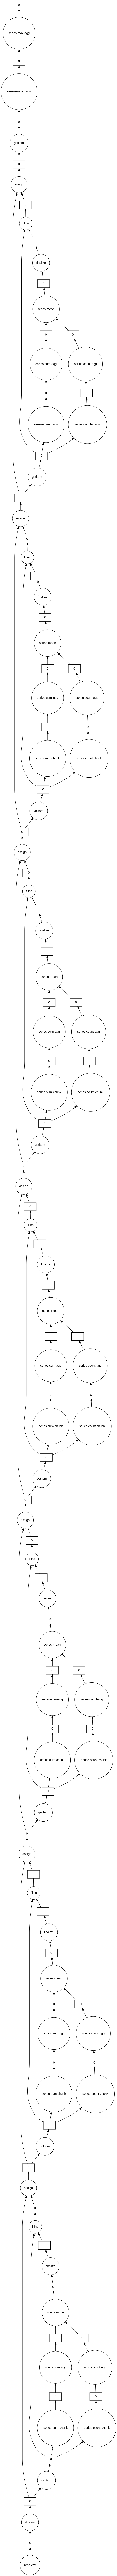

In [11]:

df["Parch"].max().visualize()

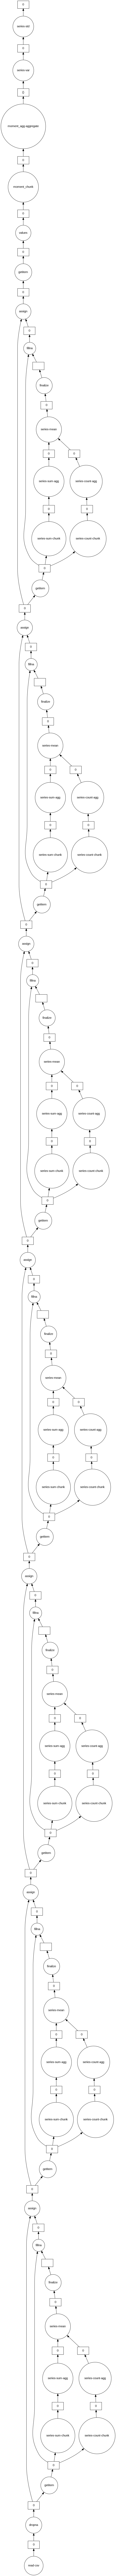

In [12]:
df["Fare"].std().visualize()

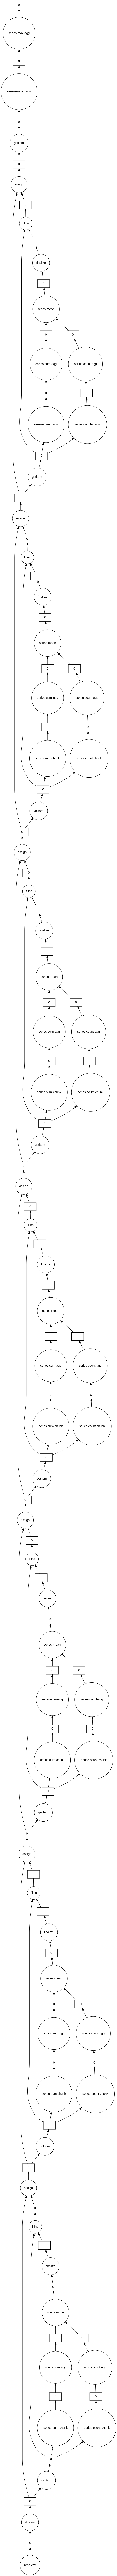

In [13]:
df["Age"].max().visualize()

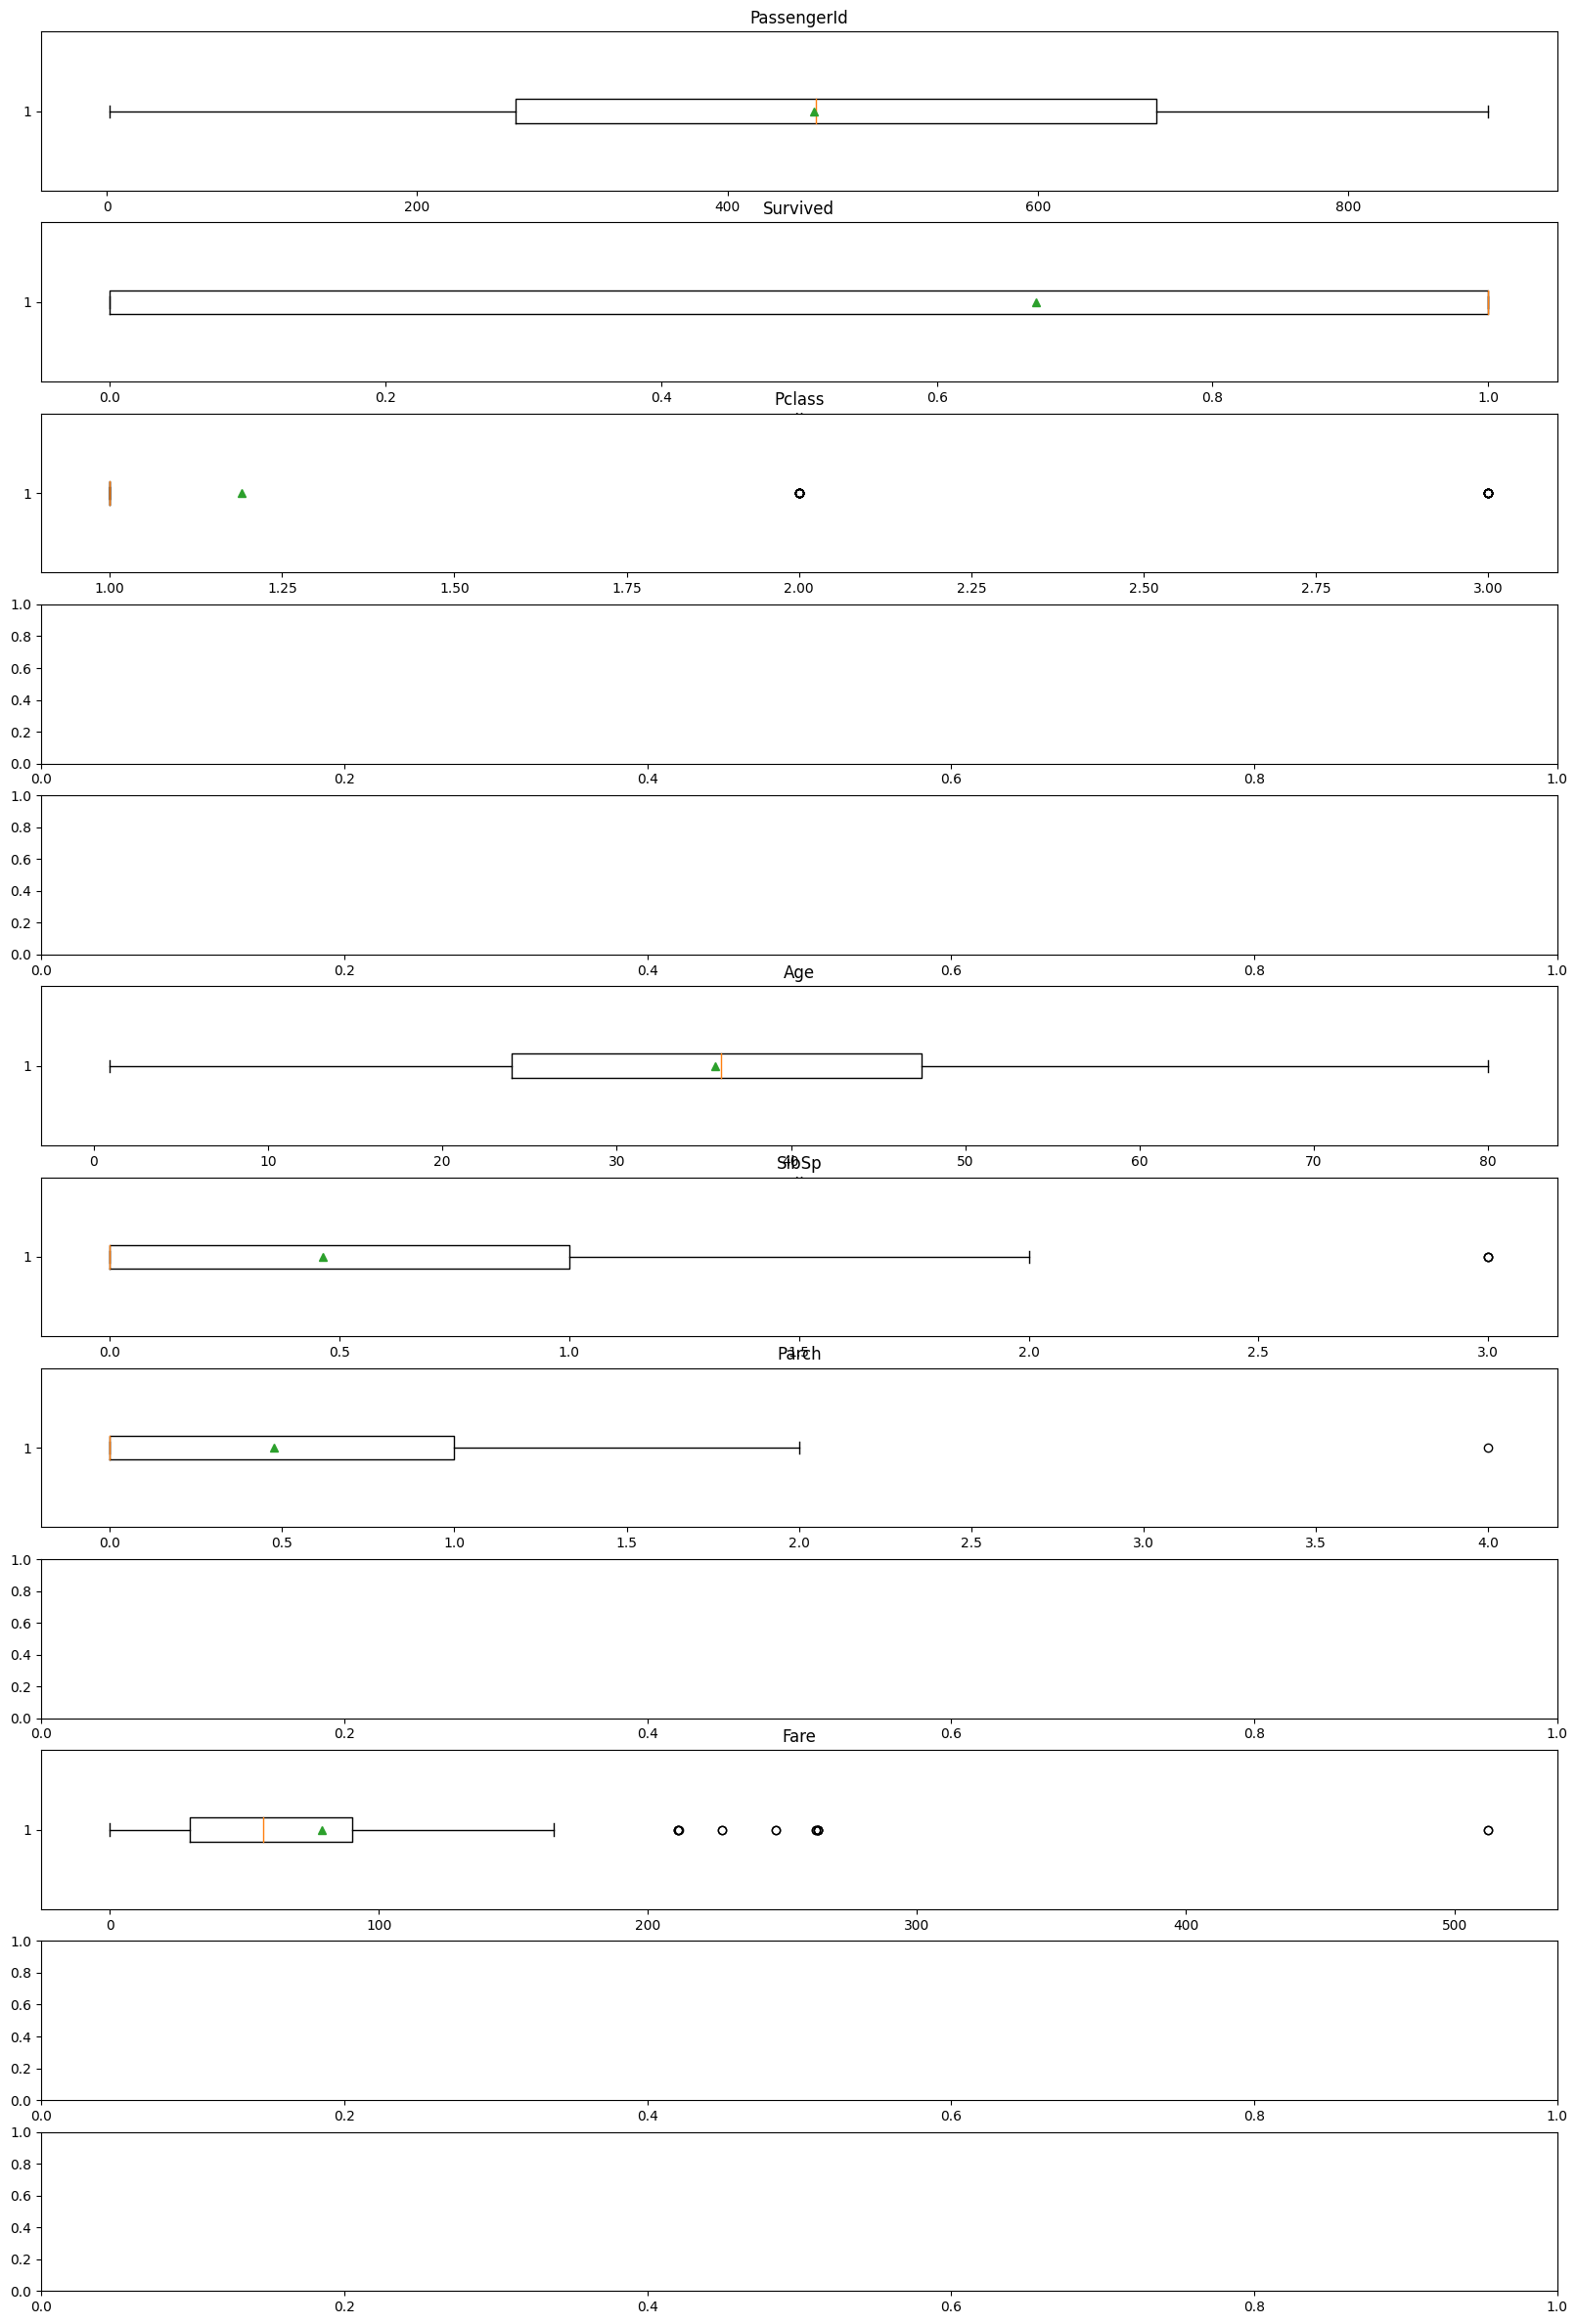

In [14]:
l=len(df.sum().compute())
import matplotlib.pyplot as plt
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
df_compute=df.compute()
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].boxplot(df[col],showmeans=True, vert=False)
    axes[i].set_xlabel('x')
    axes[i].set_title("{}".format(col))

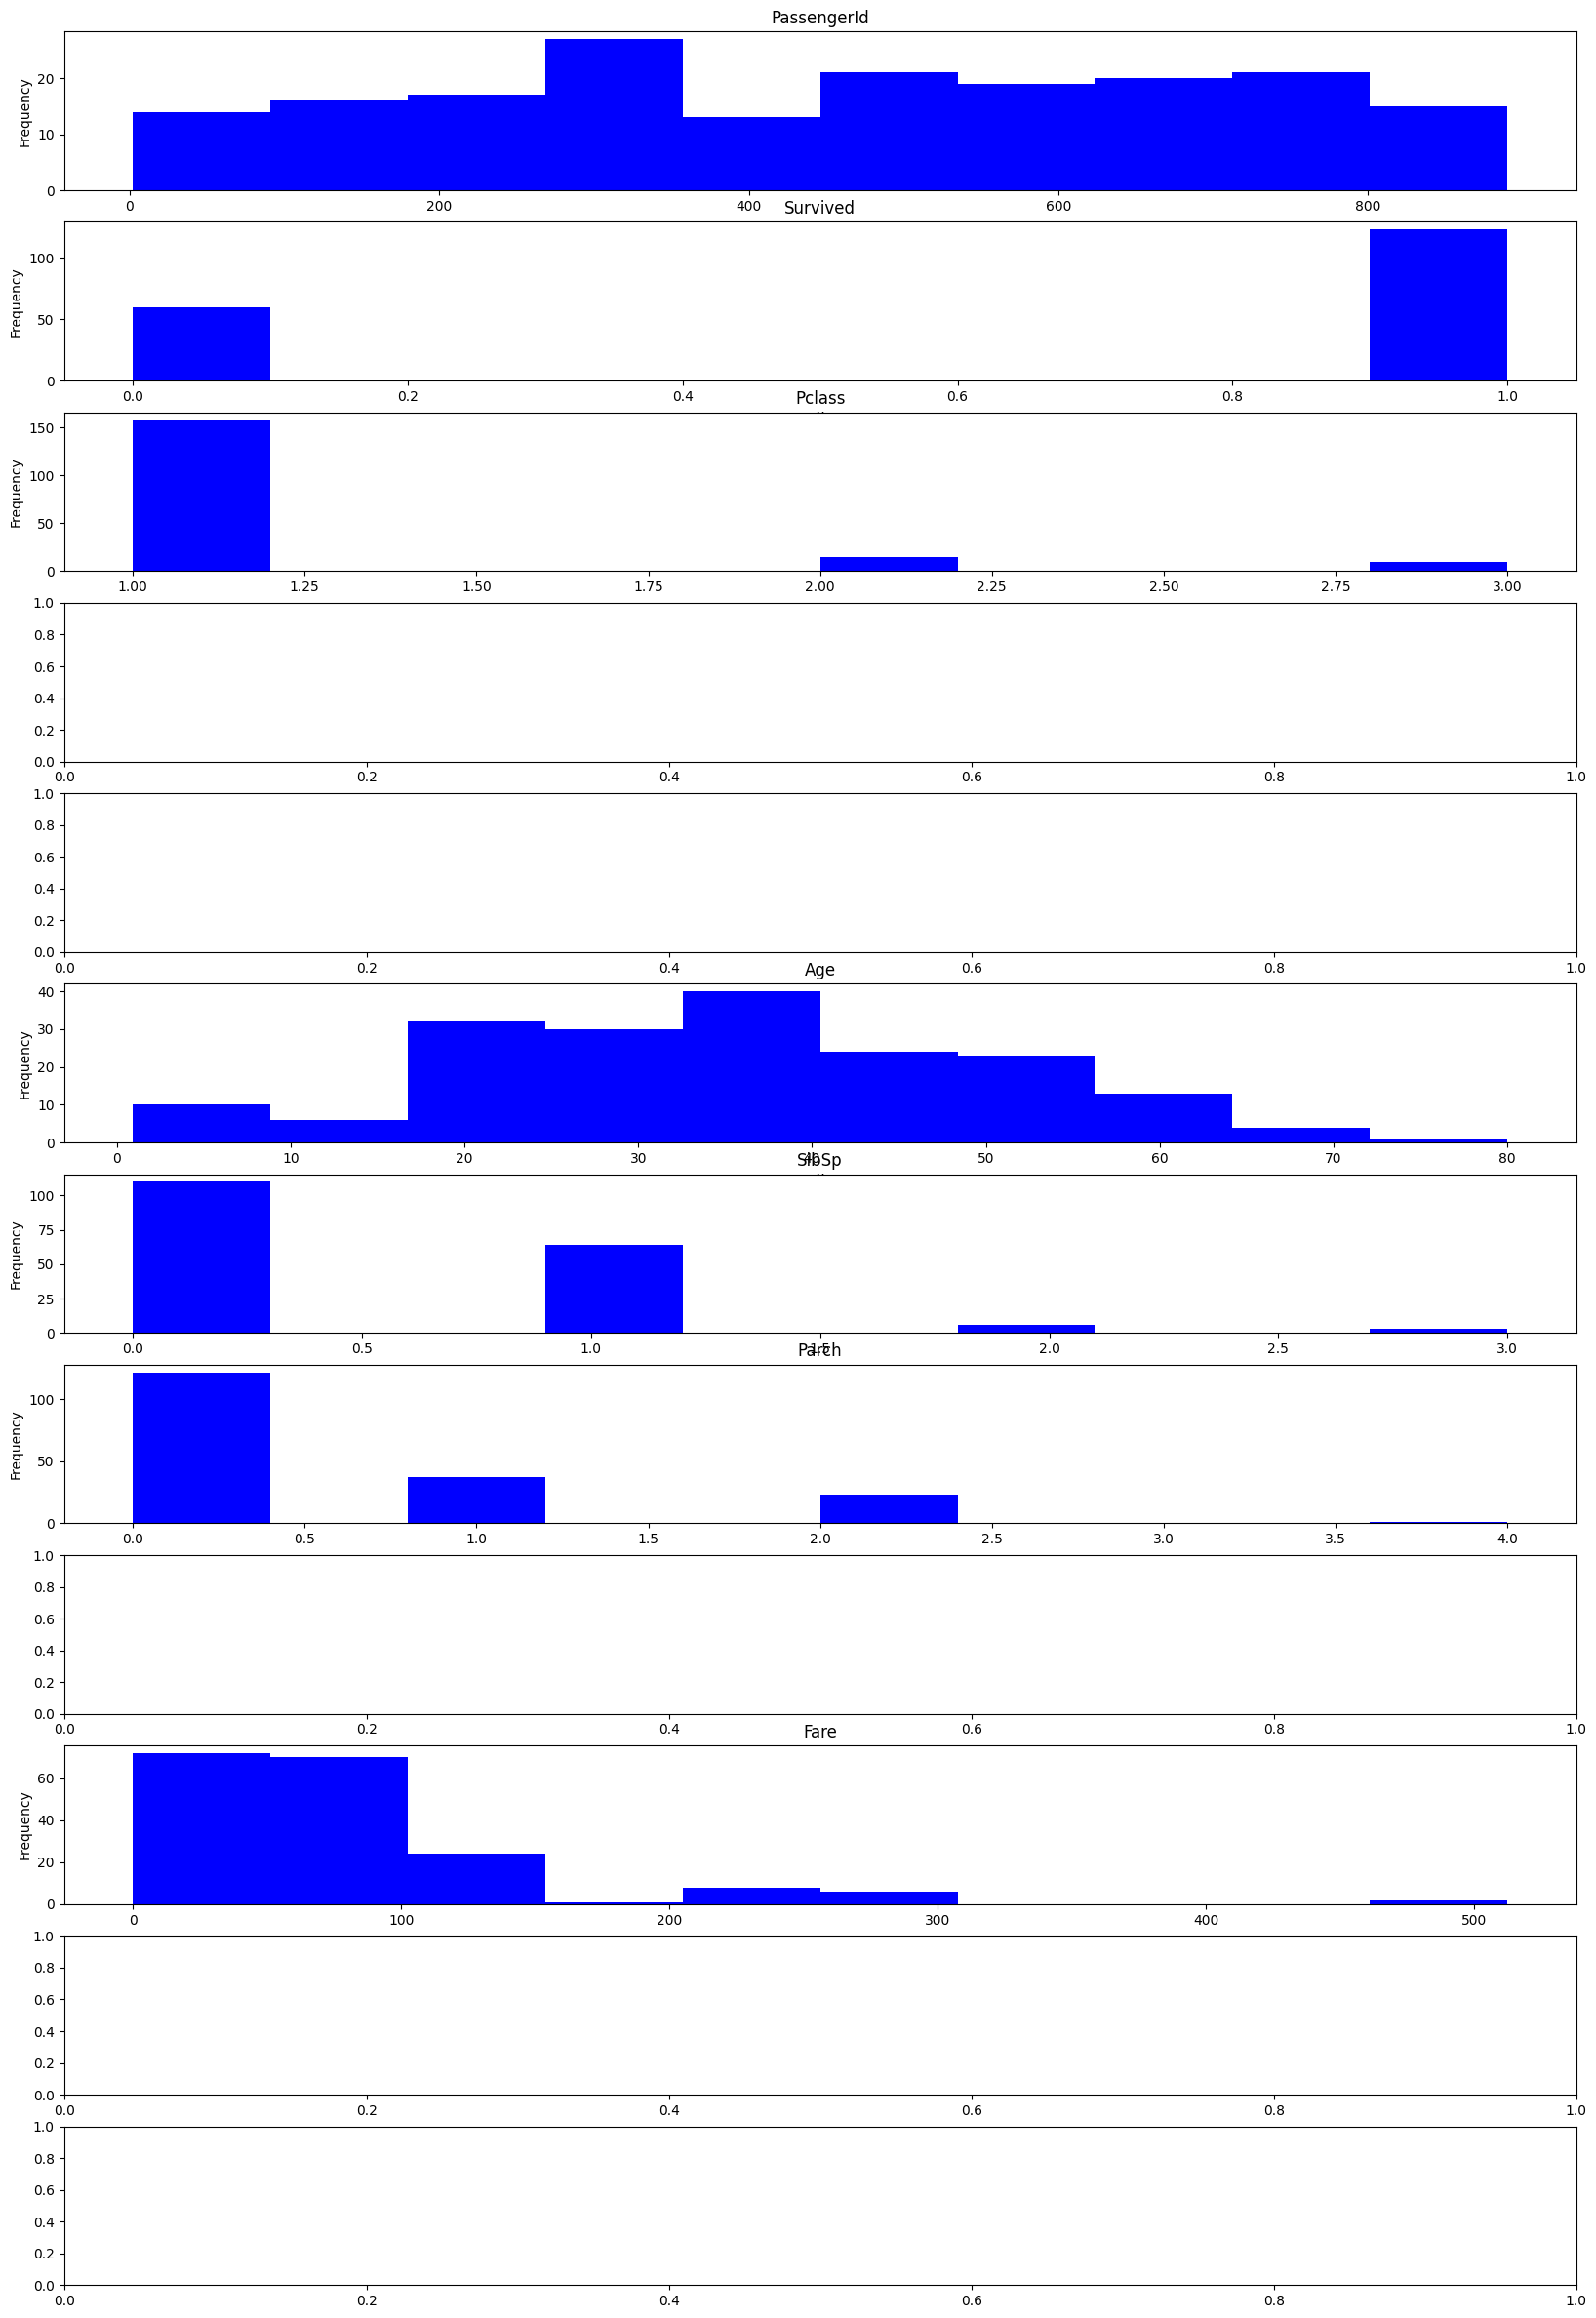

In [15]:
labels = set()
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].hist(df[col], bins=10, color='blue')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title("{}".format(col))

In [16]:
df

Dask DataFrame Structure:
              PassengerId Survived Pclass    Name     Sex      Age  SibSp  Parch  Ticket     Fare   Cabin Embarked
npartitions=1                                                                                                     
                    int64    int64  int64  object  object  float64  int64  int64  object  float64  object   object
                      ...      ...    ...     ...     ...      ...    ...    ...     ...      ...     ...      ...
Dask Name: assign, 65 graph layers

INFO:distributed.utils_perf:full garbage collection released 14.46 MiB from 36055 reference cycles (threshold: 9.54 MiB)


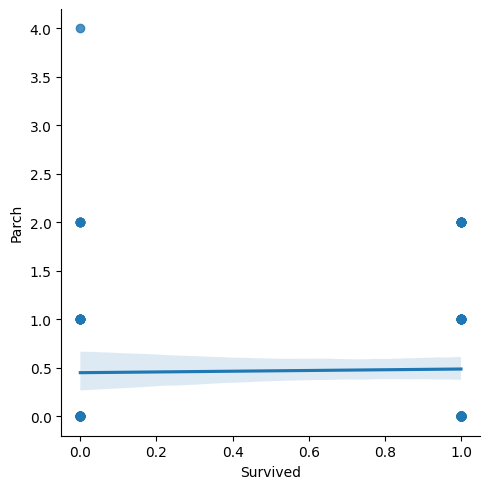

In [17]:
import seaborn as sns
df_compute=df.compute()
sns.lmplot(x = 'Survived', y = 'Parch', data = df_compute)

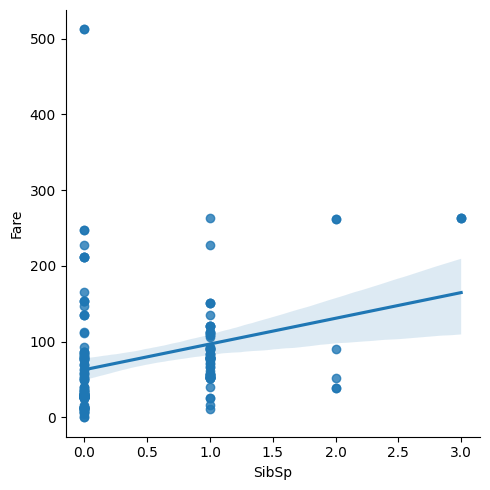

In [18]:
sns.lmplot(x = 'SibSp', y = 'Fare', data = df_compute)

<ipython-input-19-ef7c65e67123>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'], fit=stats.norm);


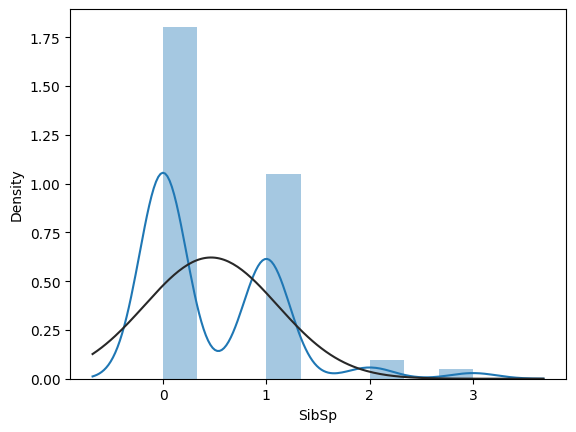

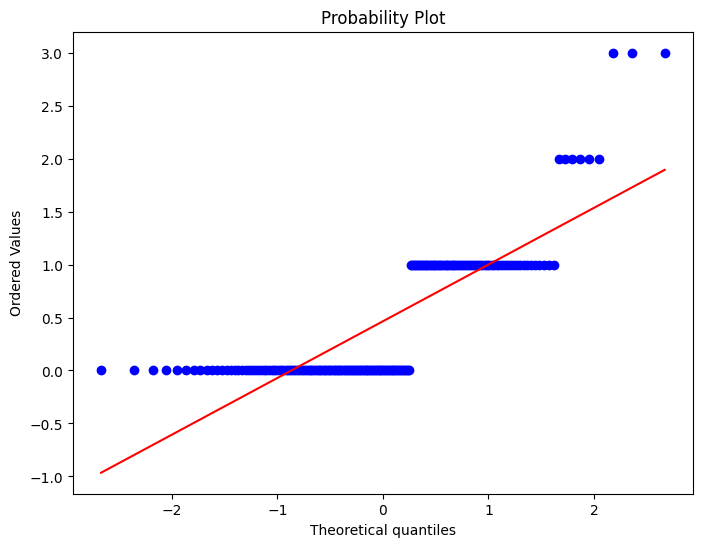

In [19]:
from scipy.stats import norm
import scipy.stats as stats
sns.distplot(df['SibSp'], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(df['SibSp'], plot=plt);

<ipython-input-20-4be79f9827db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], fit=stats.norm);


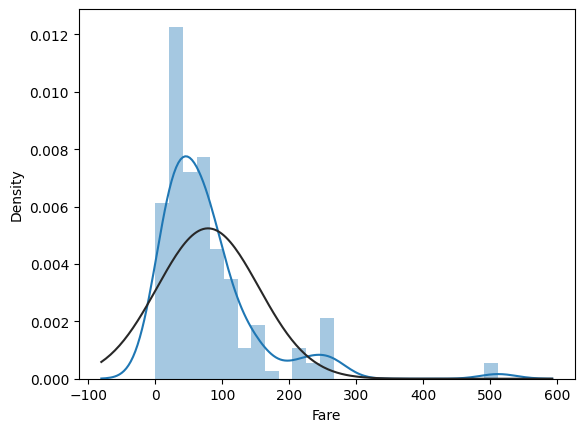

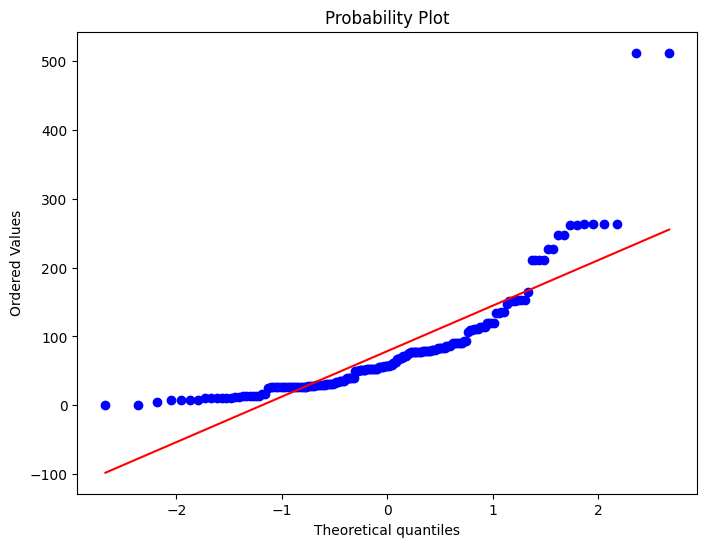

In [20]:
sns.distplot(df['Fare'], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(df['Fare'], plot=plt);

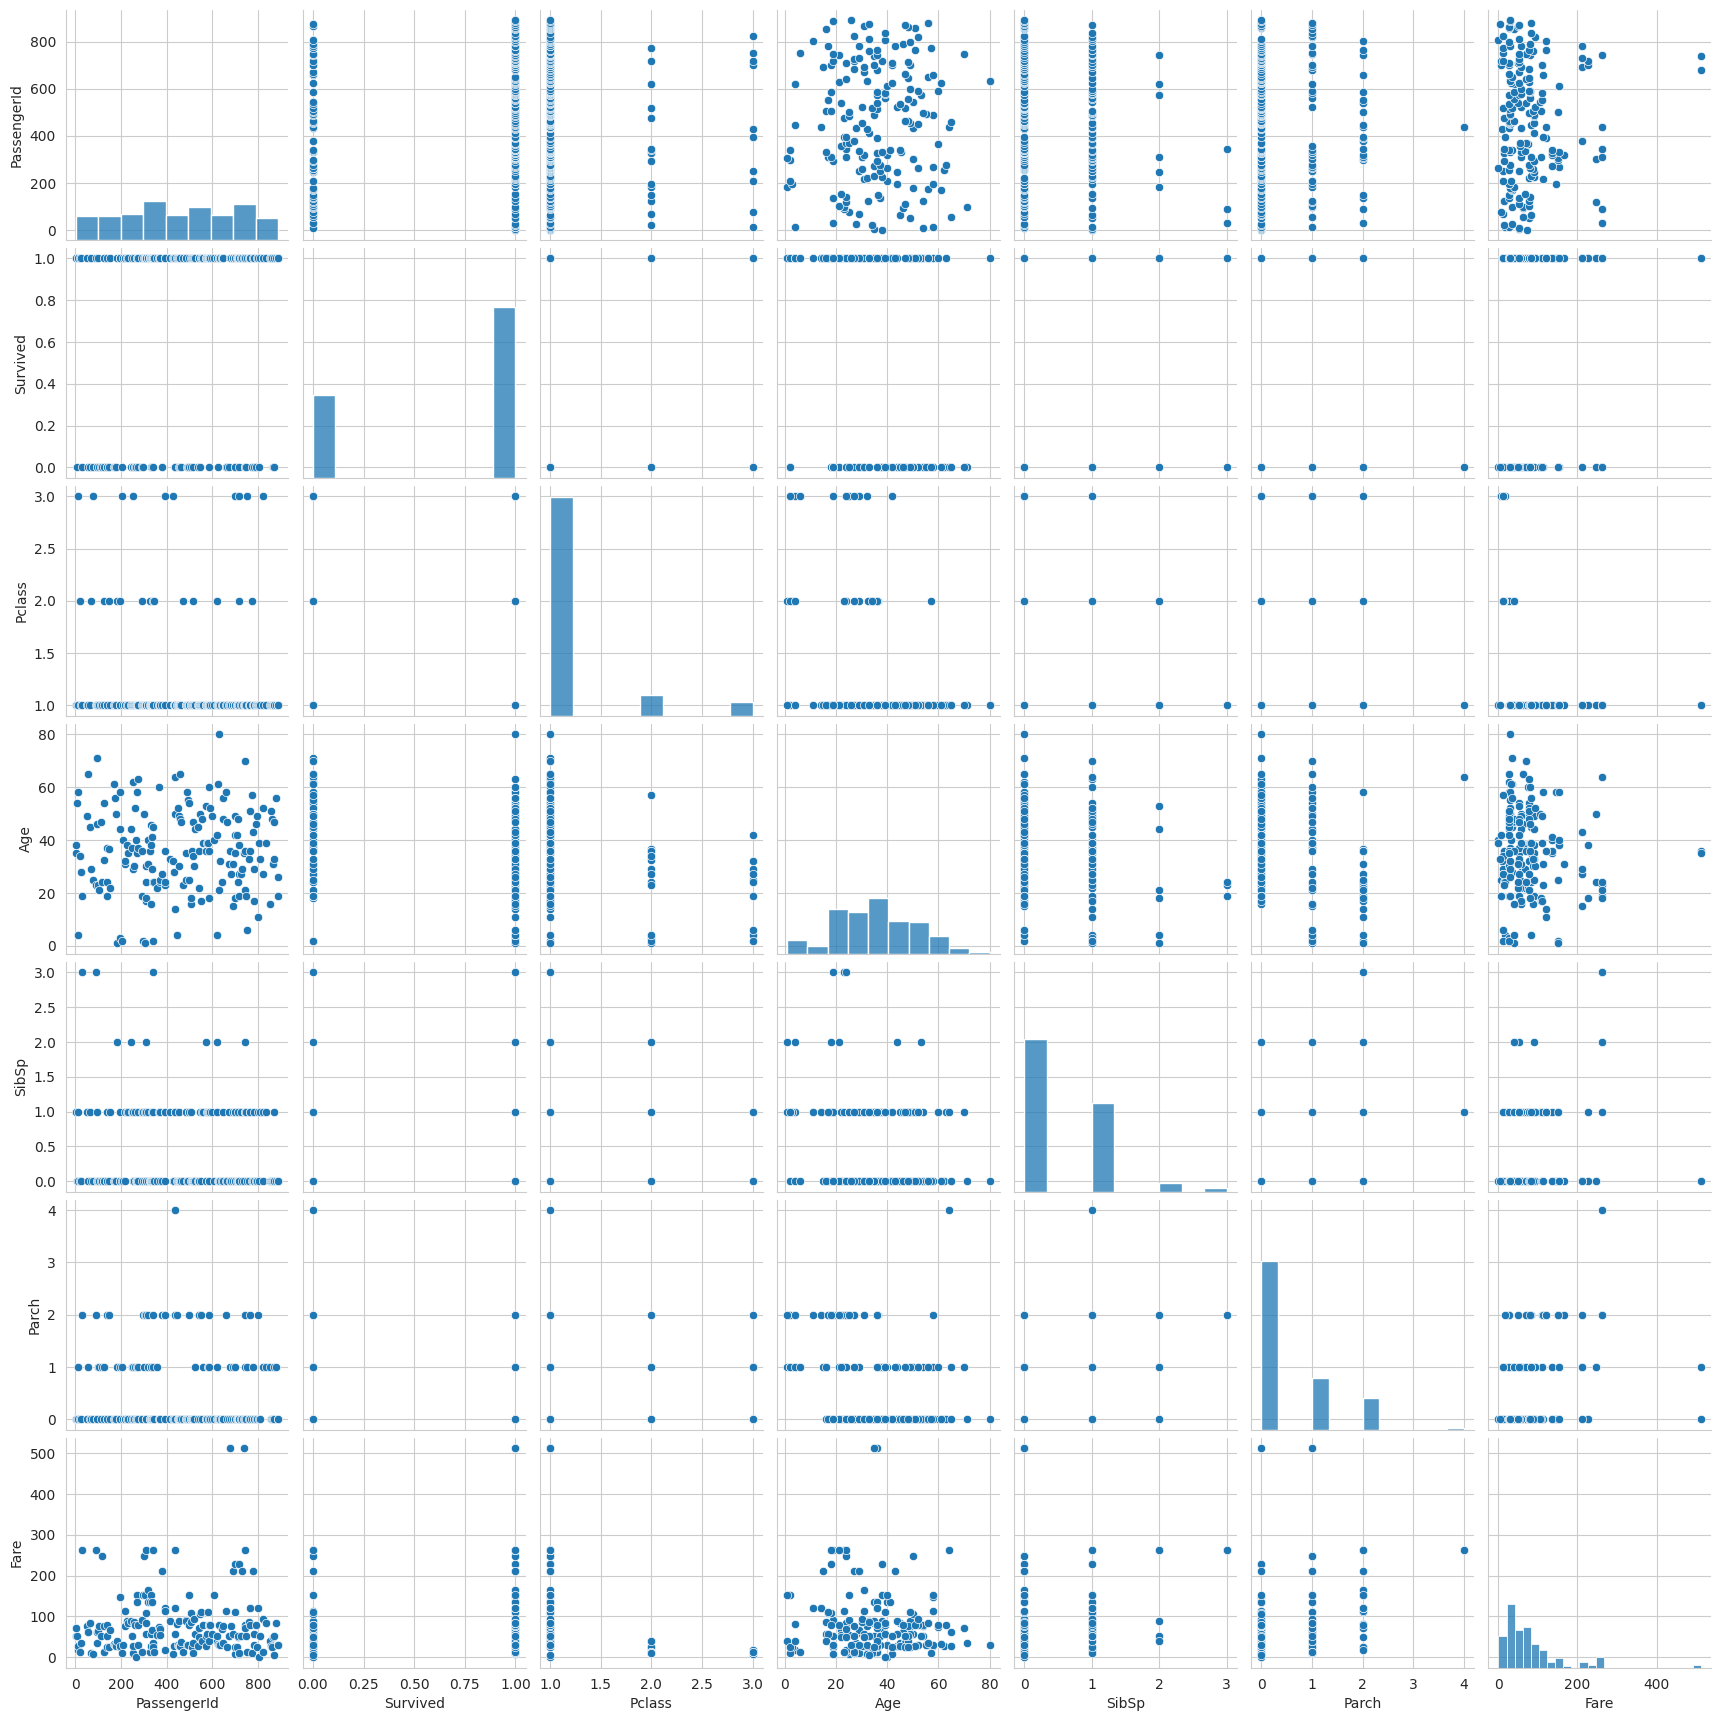

In [ ]:
sns.pairplot(df_compute);

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7375: FutureWarning: The default value of numeric_only will be `False` in a future version of Dask.
  warnings.warn(


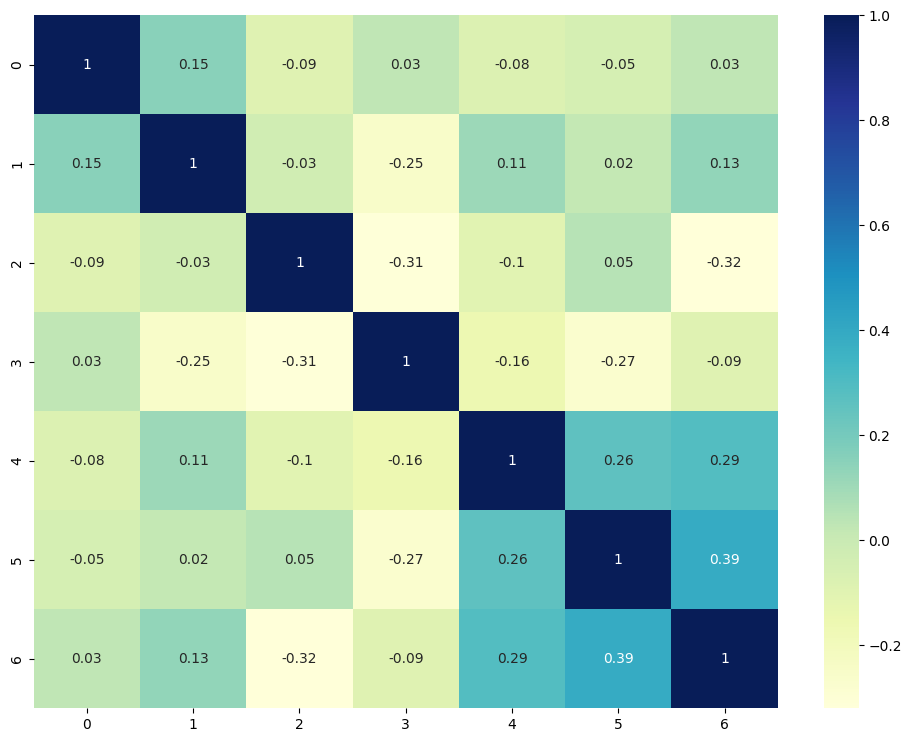

In [21]:
plt.figure(figsize=(12, 9));
correlation_matrix =df.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

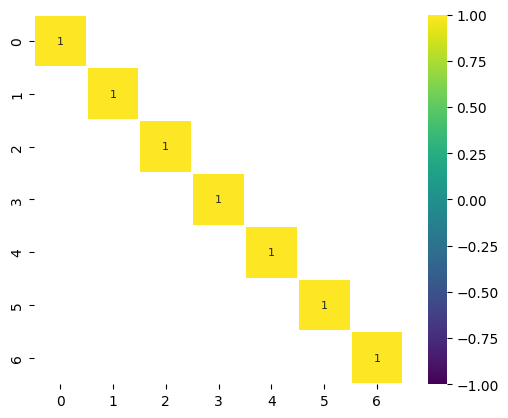

In [22]:
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:

!pip install dask_ml
!pip install "dask[complete]"
!pip install "dask[dataframe]"


In [29]:


from sklearn.cluster import KMeans
from joblib import parallel_backend
# Select only the numeric columns
df_numeric = df_compute.select_dtypes (include= ['number'])

# Or convert categorical columns into dummy variables
df_dummies = pd.get_dummies (df_compute)

# Then pass the modified dataframe to the KMeans algorithm
with parallel_backend ('dask'):
    km = KMeans (n_clusters=3)
    km.fit (df_numeric) # or df_dummies
    labels = km.predict (df_numeric) # or df_dummies
#I do not know why the dask_ml.cluster can not import
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df = dd.read_csv('breast-cancer-wisconsin.csv', dtype={'BareNuclei': 'object'},na_values='?')

In [ ]:
df=df.dropna()
for i in df.columns:
  if  pd.api.types.is_numeric_dtype(df[i]):
    df[i]=df[i].fillna(df[i].mean())

In [ ]:
for i in df.columns:
  if  pd.api.types.is_numeric_dtype(df[i]):
    print("Max of ",i,"  is: ",df[i].max().compute() )
    df[i].min().visualize()

    print("Min of ",i,"  is: ",df[i].min().compute() )


    print("Mean of ",i,"  is: ",df[i].mean().compute() )


    print("Std of ",i,"  is: ",df[i].std().compute() )

Max of  CodeNumber   is:  13454352
Min of  CodeNumber   is:  63375
Mean of  CodeNumber   is:  1076832.6832844575
Std of  CodeNumber   is:  621092.602630571
Max of  ClumpThickness   is:  10
Min of  ClumpThickness   is:  1
Mean of  ClumpThickness   is:  4.441348973607038
Std of  ClumpThickness   is:  2.822750545931825
Max of  UniformityCellSize   is:  10
Min of  UniformityCellSize   is:  1
Mean of  UniformityCellSize   is:  3.153958944281525
Std of  UniformityCellSize   is:  3.066285404742027
Max of  UniformityCellShape   is:  10
Min of  UniformityCellShape   is:  1
Mean of  UniformityCellShape   is:  3.218475073313783
Std of  UniformityCellShape   is:  2.989567571477377
Max of  MarginalAdhesion   is:  10
Min of  MarginalAdhesion   is:  1
Mean of  MarginalAdhesion   is:  2.832844574780059
Std of  MarginalAdhesion   is:  2.8658053588236156
Max of  SingleEpithelialCellSize   is:  10
Min of  SingleEpithelialCellSize   is:  1
Mean of  SingleEpithelialCellSize   is:  3.2360703812316713
Std of

IndexError: index 10 is out of bounds for axis 0 with size 10

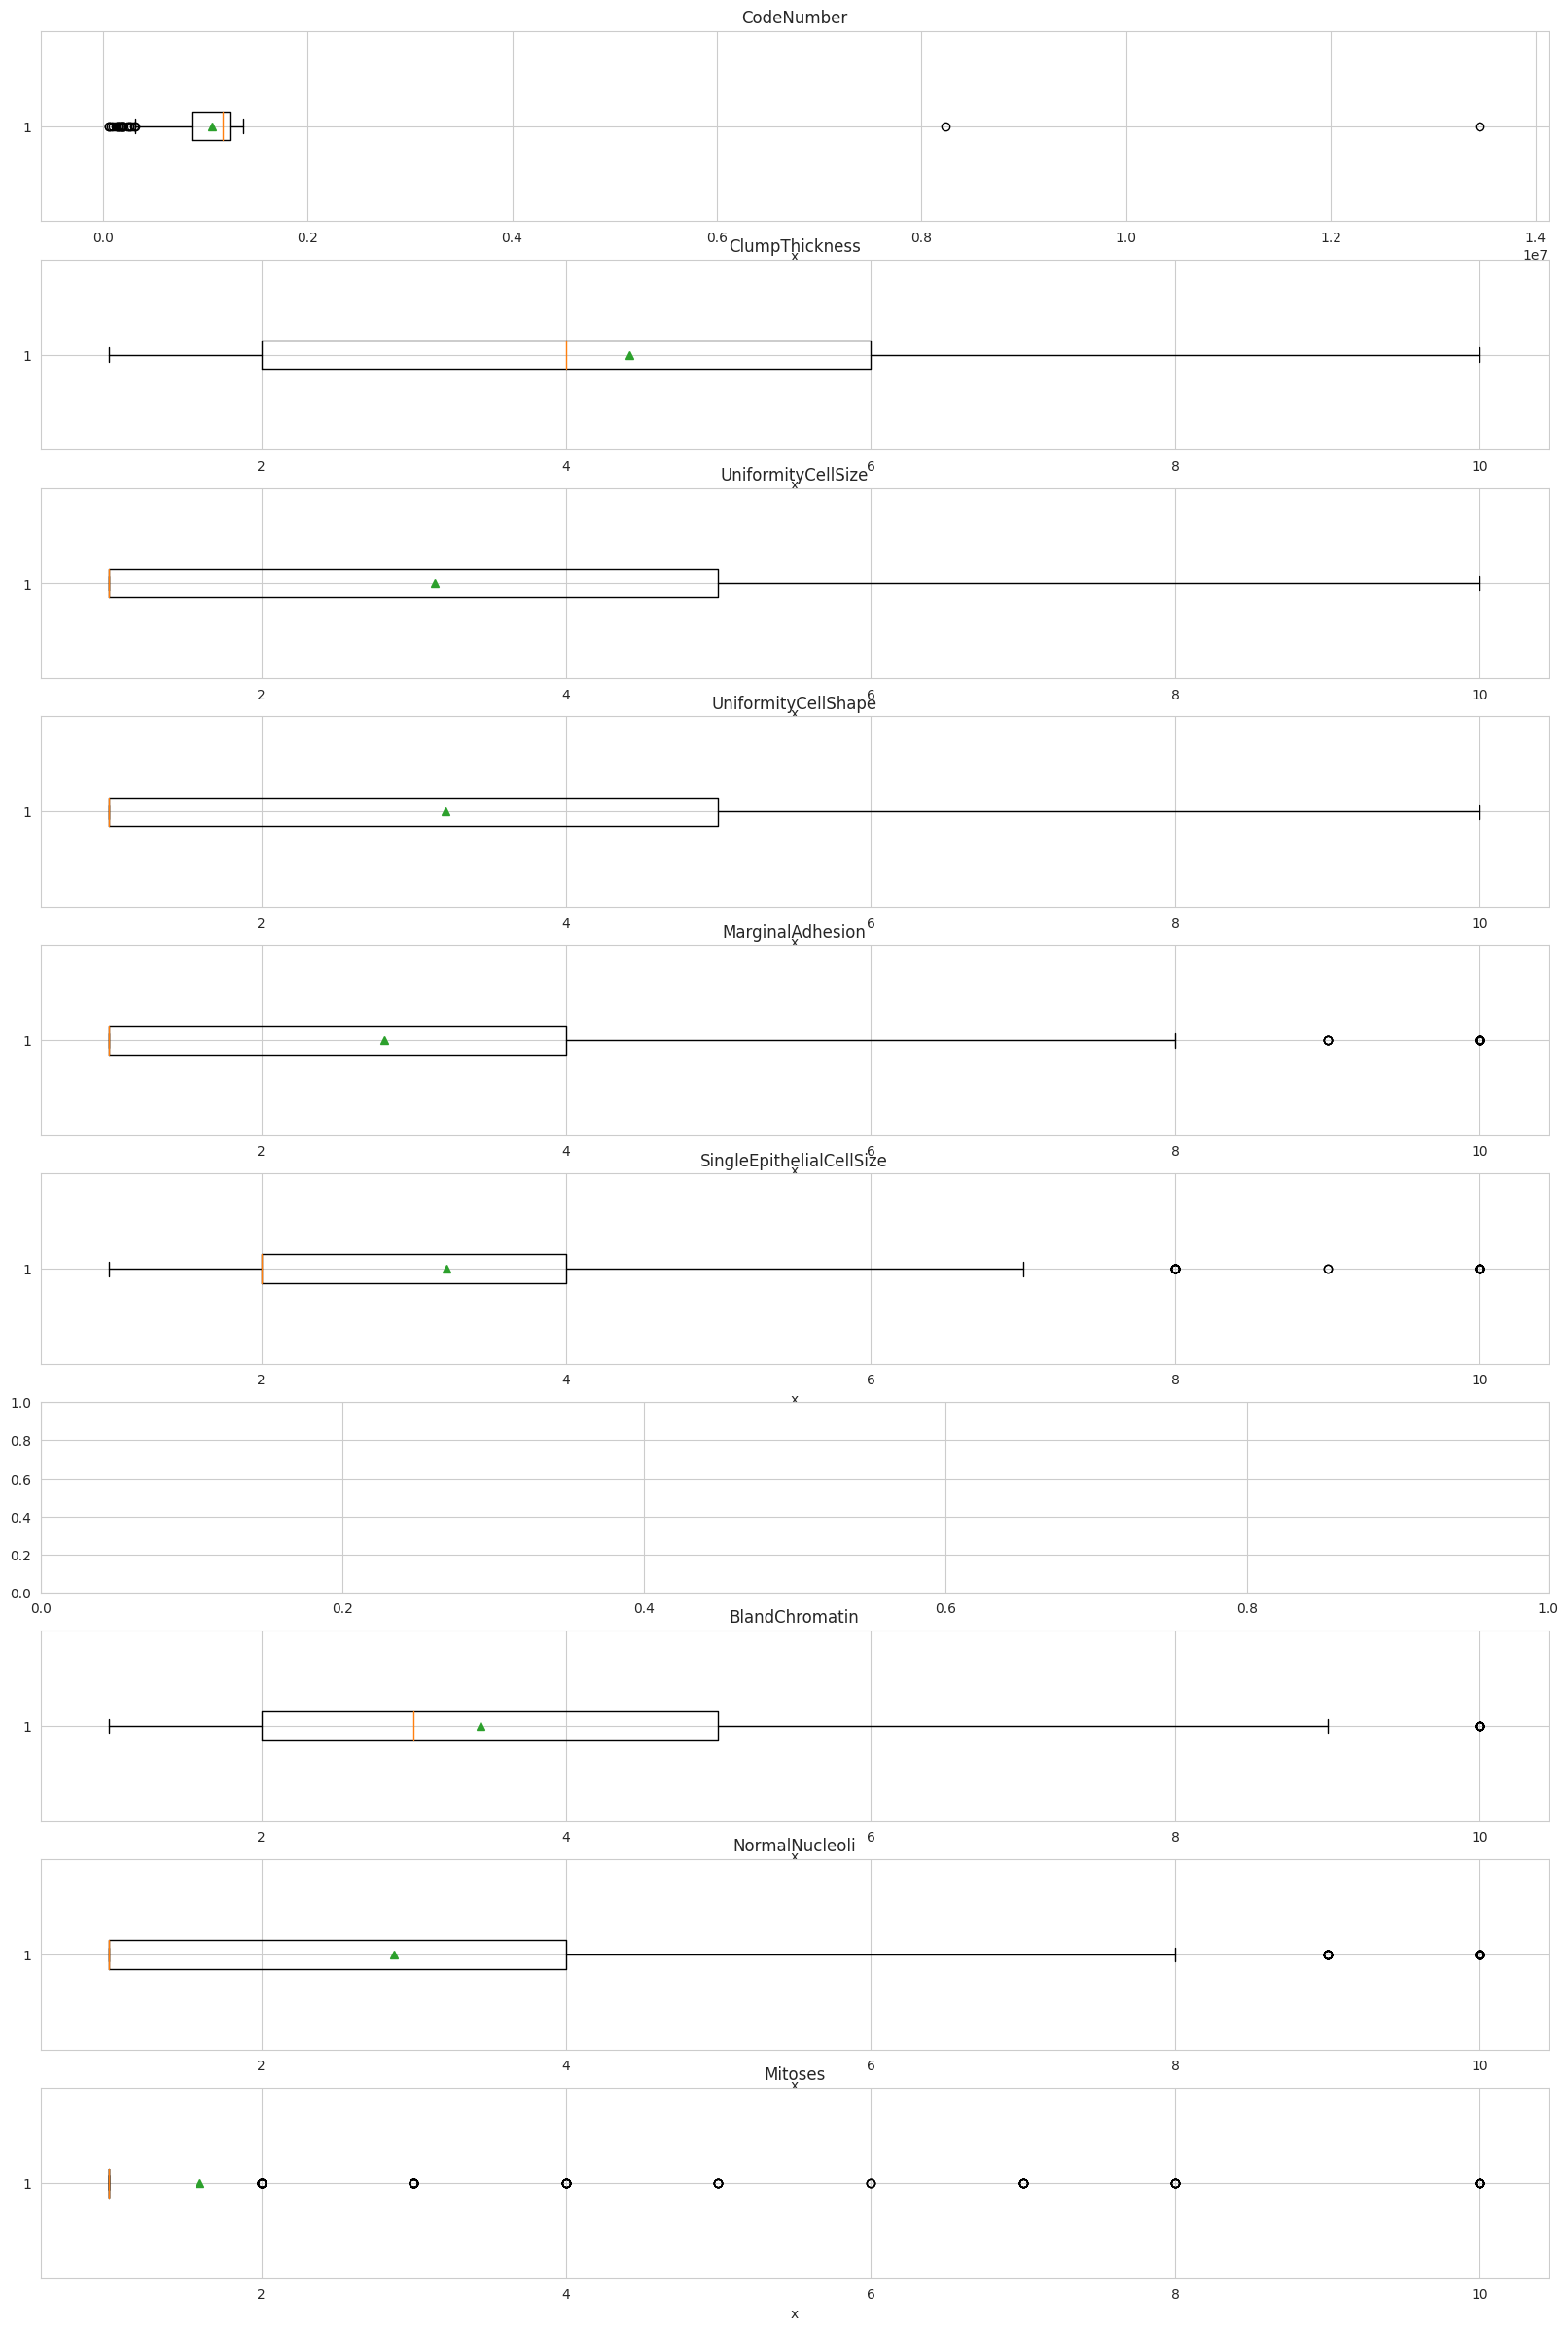

In [ ]:
l=len(df.sum().compute())
import matplotlib.pyplot as plt
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
df_compute=df.compute()
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].boxplot(df[col],showmeans=True, vert=False)
    axes[i].set_xlabel('x')
    axes[i].set_title("{}".format(col))

IndexError: index 10 is out of bounds for axis 0 with size 10

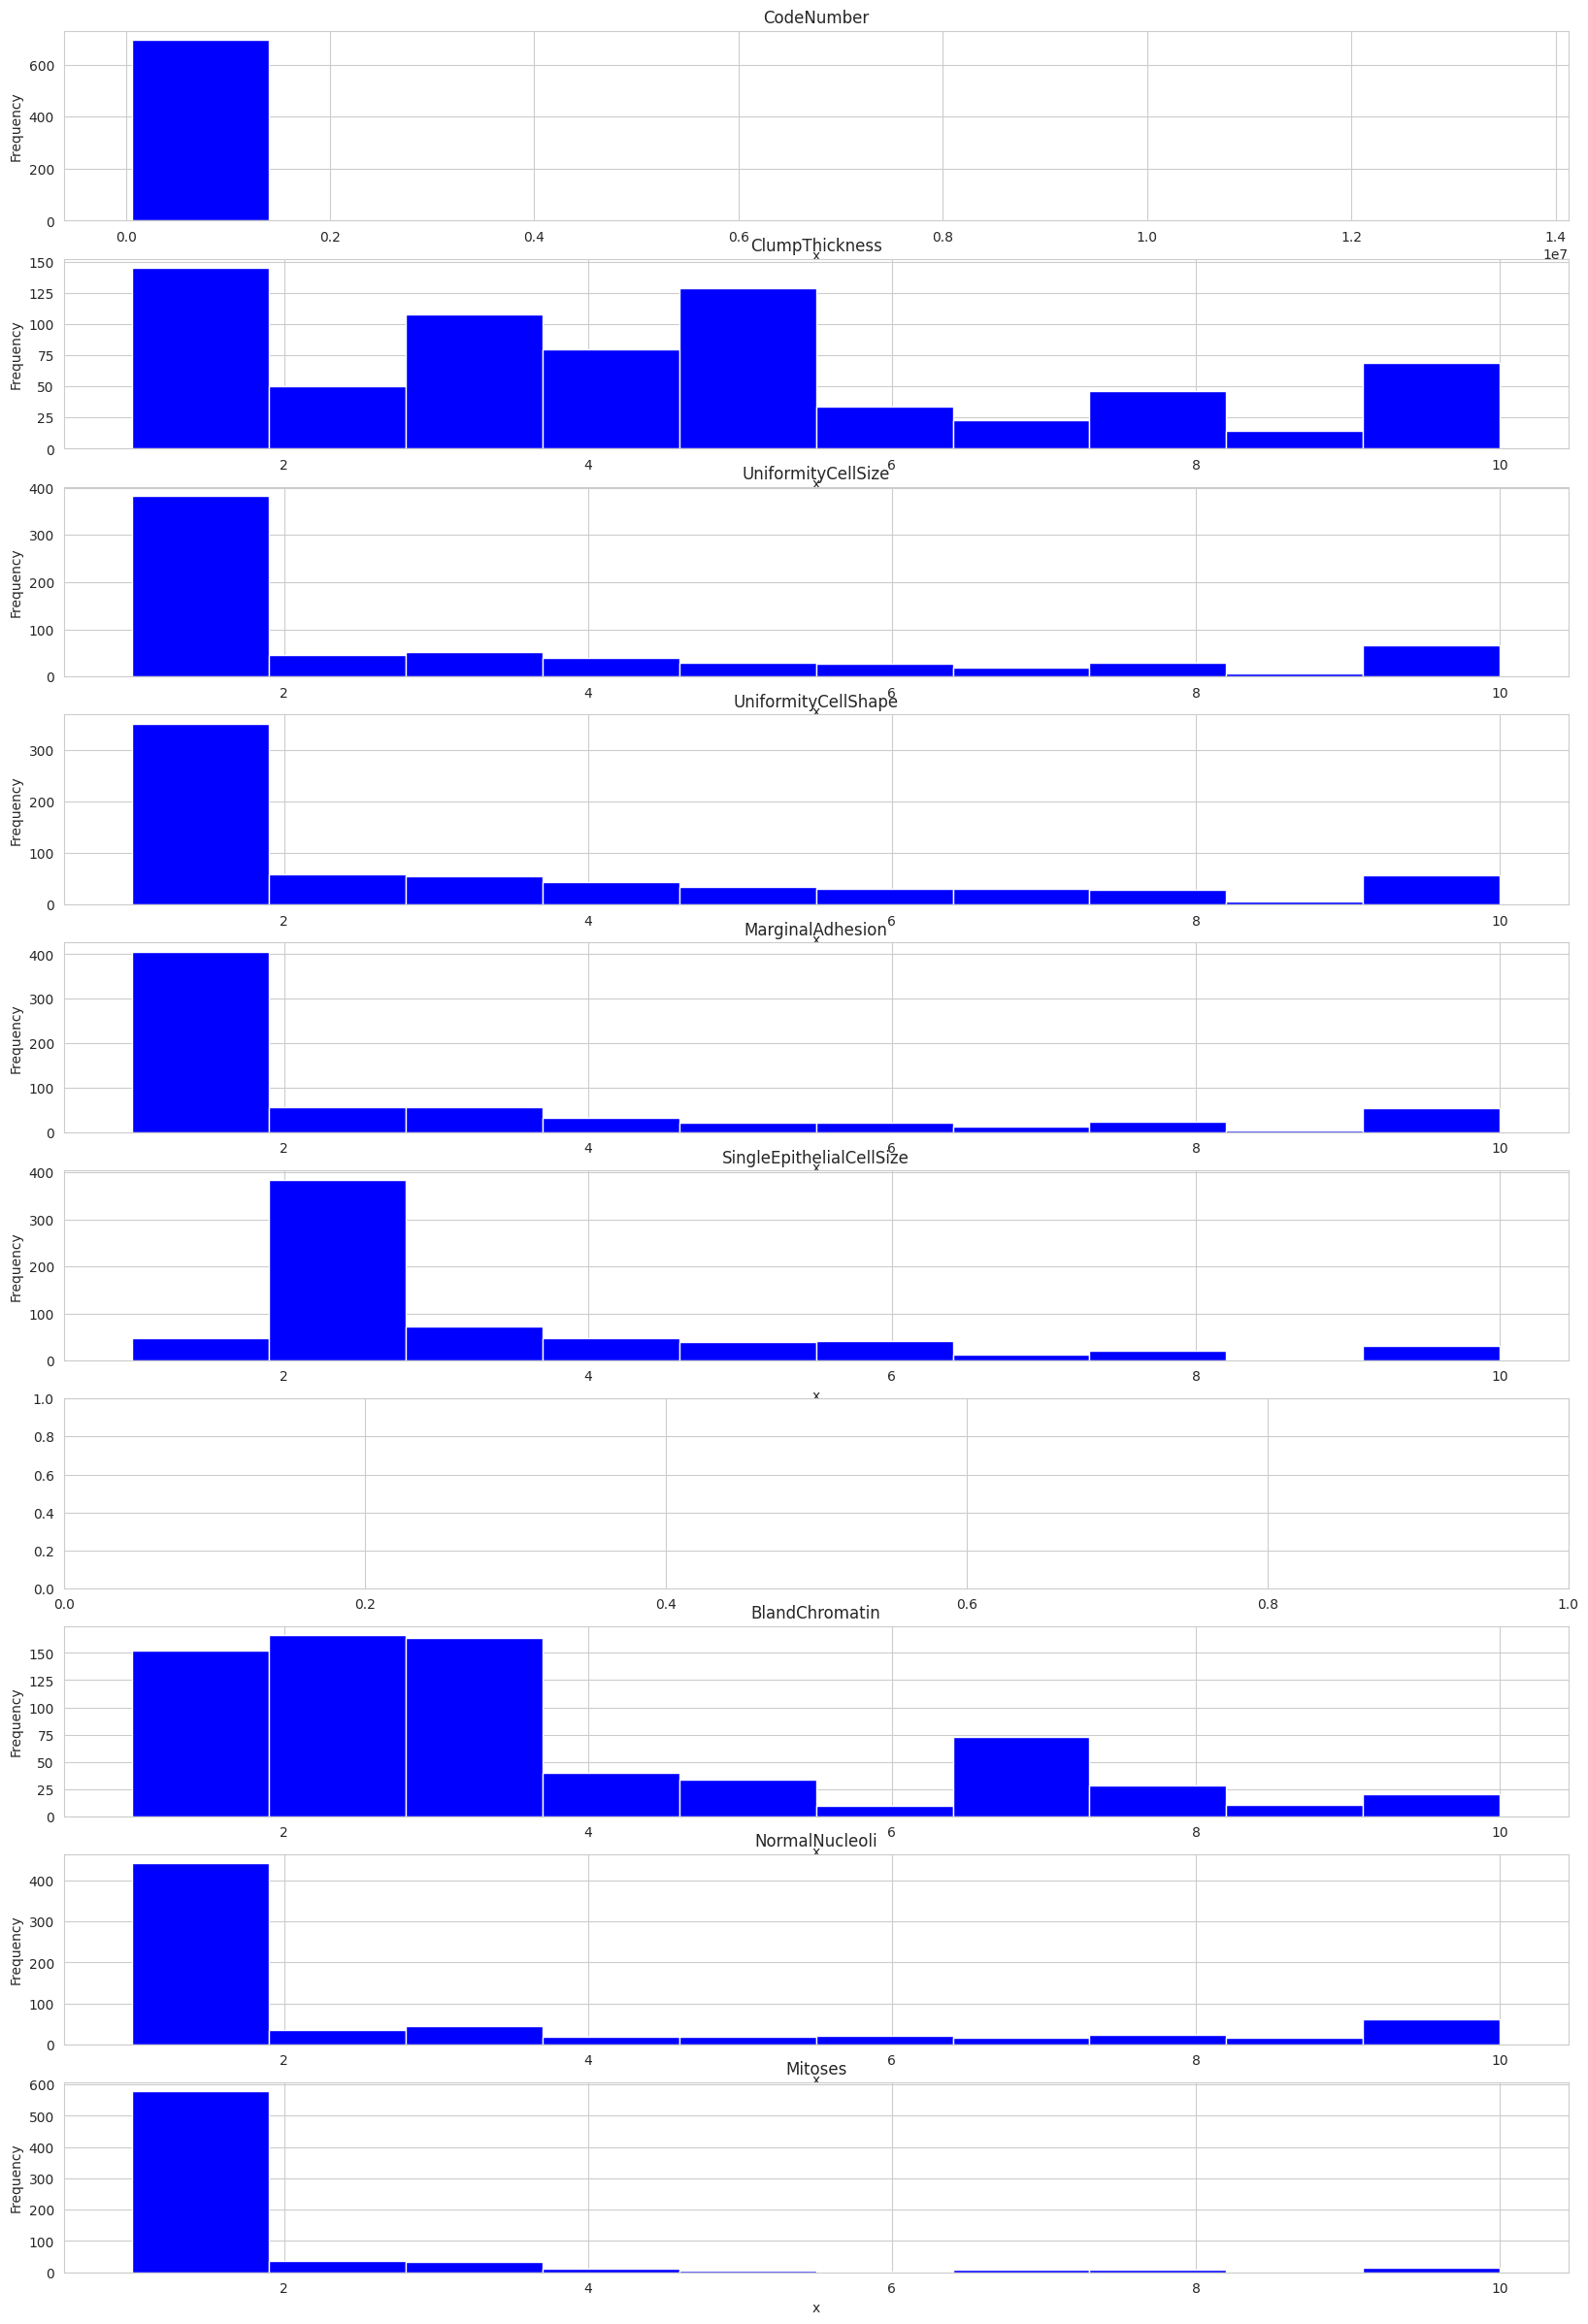

In [ ]:
labels = set()
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].hist(df[col], bins=10, color='blue')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title("{}".format(col))

In [ ]:
print("Type of the dataset: ", type(df))
print("Shape of data: ", df.shape)



Type of the dataset:  <class 'dask.dataframe.core.DataFrame'>
Shape of data:  (Delayed('int-0eeec9b4-d976-4fff-8598-1fc4c452eaf0'), 11)


In [ ]:
df.describe(include='all').head(20)

CodeNumber  ClumpThickness  UniformityCellSize  UniformityCellShape  \
unique           NaN             NaN                 NaN                  NaN   
count   6.820000e+02      682.000000          682.000000           682.000000   
top              NaN             NaN                 NaN                  NaN   
freq             NaN             NaN                 NaN                  NaN   
mean    1.076833e+06        4.441349            3.153959             3.218475   
std     6.210926e+05        2.822751            3.066285             2.989568   
min     6.337500e+04        1.000000            1.000000             1.000000   
25%     8.774540e+05        2.000000            1.000000             1.000000   
50%     1.171820e+06        4.000000            1.000000             1.000000   
75%     1.238741e+06        6.000000            5.000000             5.000000   
max     1.345435e+07       10.000000           10.000000            10.000000   

        MarginalAdhesion  SingleEpithelialCellSize BareNuclei  BlandChromatin  \
unique               NaN                       NaN         10             NaN   
count         682.000000                682.000000        682      682.000000   
top                  NaN                       NaN          1             NaN   
freq                 NaN                       NaN        401             NaN   
mean            2.832845                  3.236070        NaN        3.445748   
std             2.865805                  2.224214        NaN        2.451435   
min             1.000000                  1.000000        NaN        1.000000   
25%             1.000000                  2.000000        NaN        2.000000   
50%             1.000000                  2.000000        NaN        3.000000   
75%             4.000000                  4.000000        NaN        5.000000   
max            10.000000                 10.000000        NaN       10.000000   

        NormalNucleoli     Mitoses  CancerType  
unique             NaN         NaN         NaN  
count       682.000000  682.000000  682.000000  
top                NaN         NaN         NaN  
freq               NaN         NaN         NaN  
mean          2.872434    1.604106    2.700880  
std           3.054065    1.733792    0.954916  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

In [ ]:
print(df.nunique().head(20))

CodeNumber                  629
ClumpThickness               10
UniformityCellSize           10
UniformityCellShape          10
MarginalAdhesion             10
SingleEpithelialCellSize     10
BareNuclei                   10
BlandChromatin               10
NormalNucleoli               10
Mitoses                       9
CancerType                    2
dtype: int64


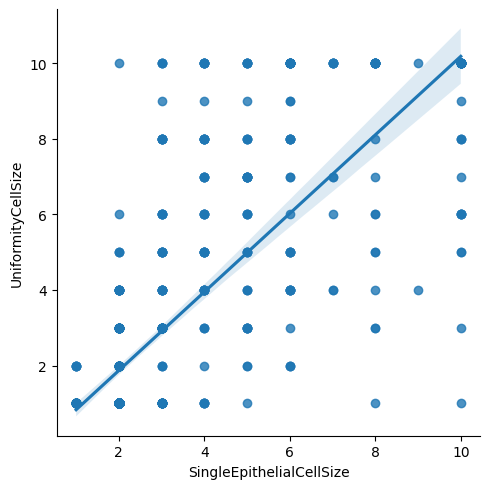

In [ ]:
import seaborn as sns
df_compute=df.compute()
sns.lmplot(x = 'SingleEpithelialCellSize', y = 'UniformityCellSize', data = df_compute)

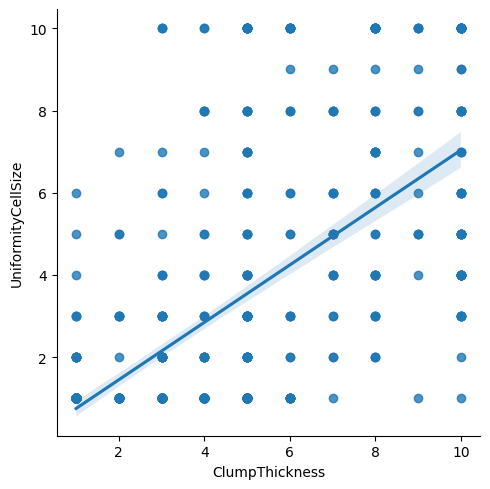

In [ ]:
import seaborn as sns
df_compute=df.compute()
sns.lmplot(x = 'ClumpThickness', y = 'UniformityCellSize', data = df_compute)


<ipython-input-223-cea60c699f4a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UniformityCellSize'], fit=stats.norm);


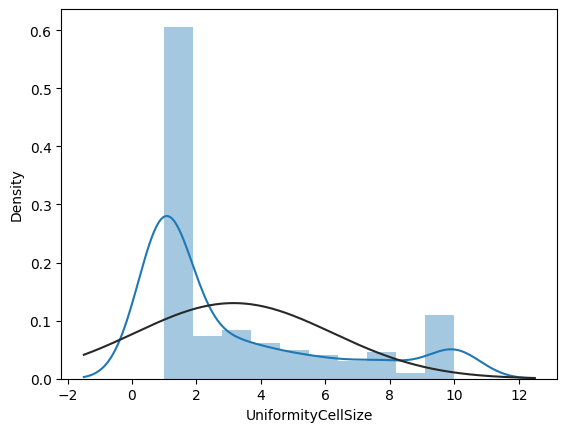

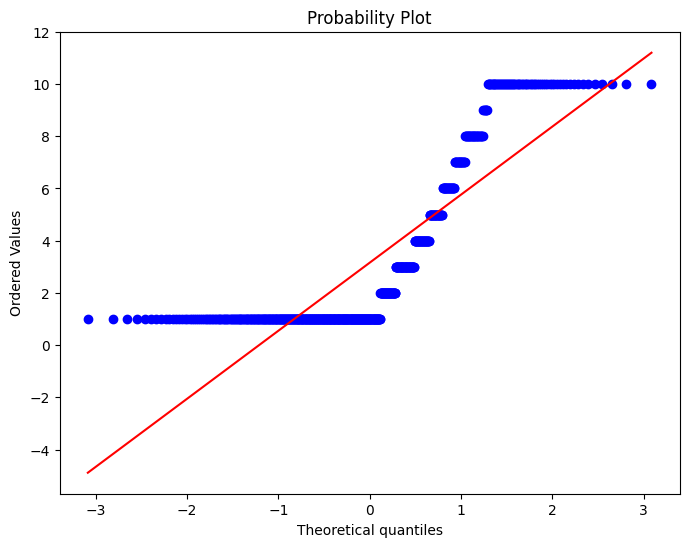

In [ ]:
from scipy.stats import norm
import scipy.stats as stats
sns.distplot(df['UniformityCellSize'], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(df['UniformityCellSize'], plot=plt);

<ipython-input-226-4bb773b554a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SingleEpithelialCellSize'], fit=stats.norm);


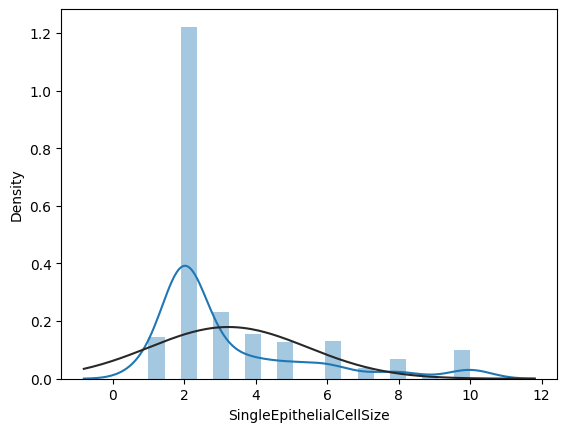

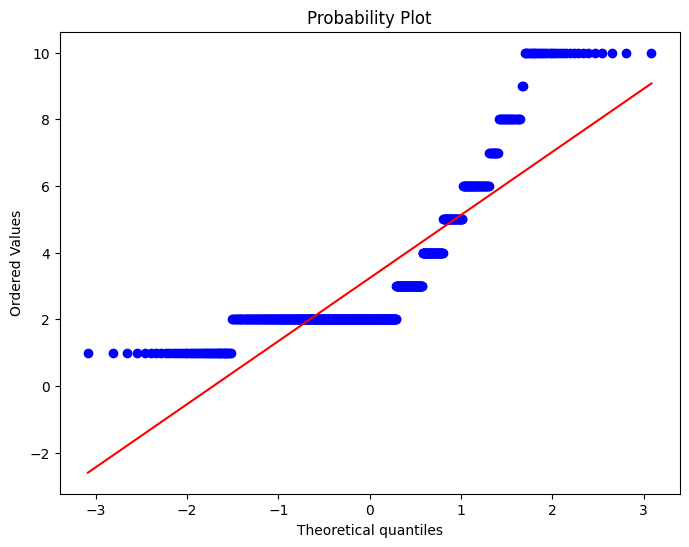

In [ ]:
from scipy.stats import norm
import scipy.stats as stats
sns.distplot(df['SingleEpithelialCellSize'], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(df['SingleEpithelialCellSize'], plot=plt);

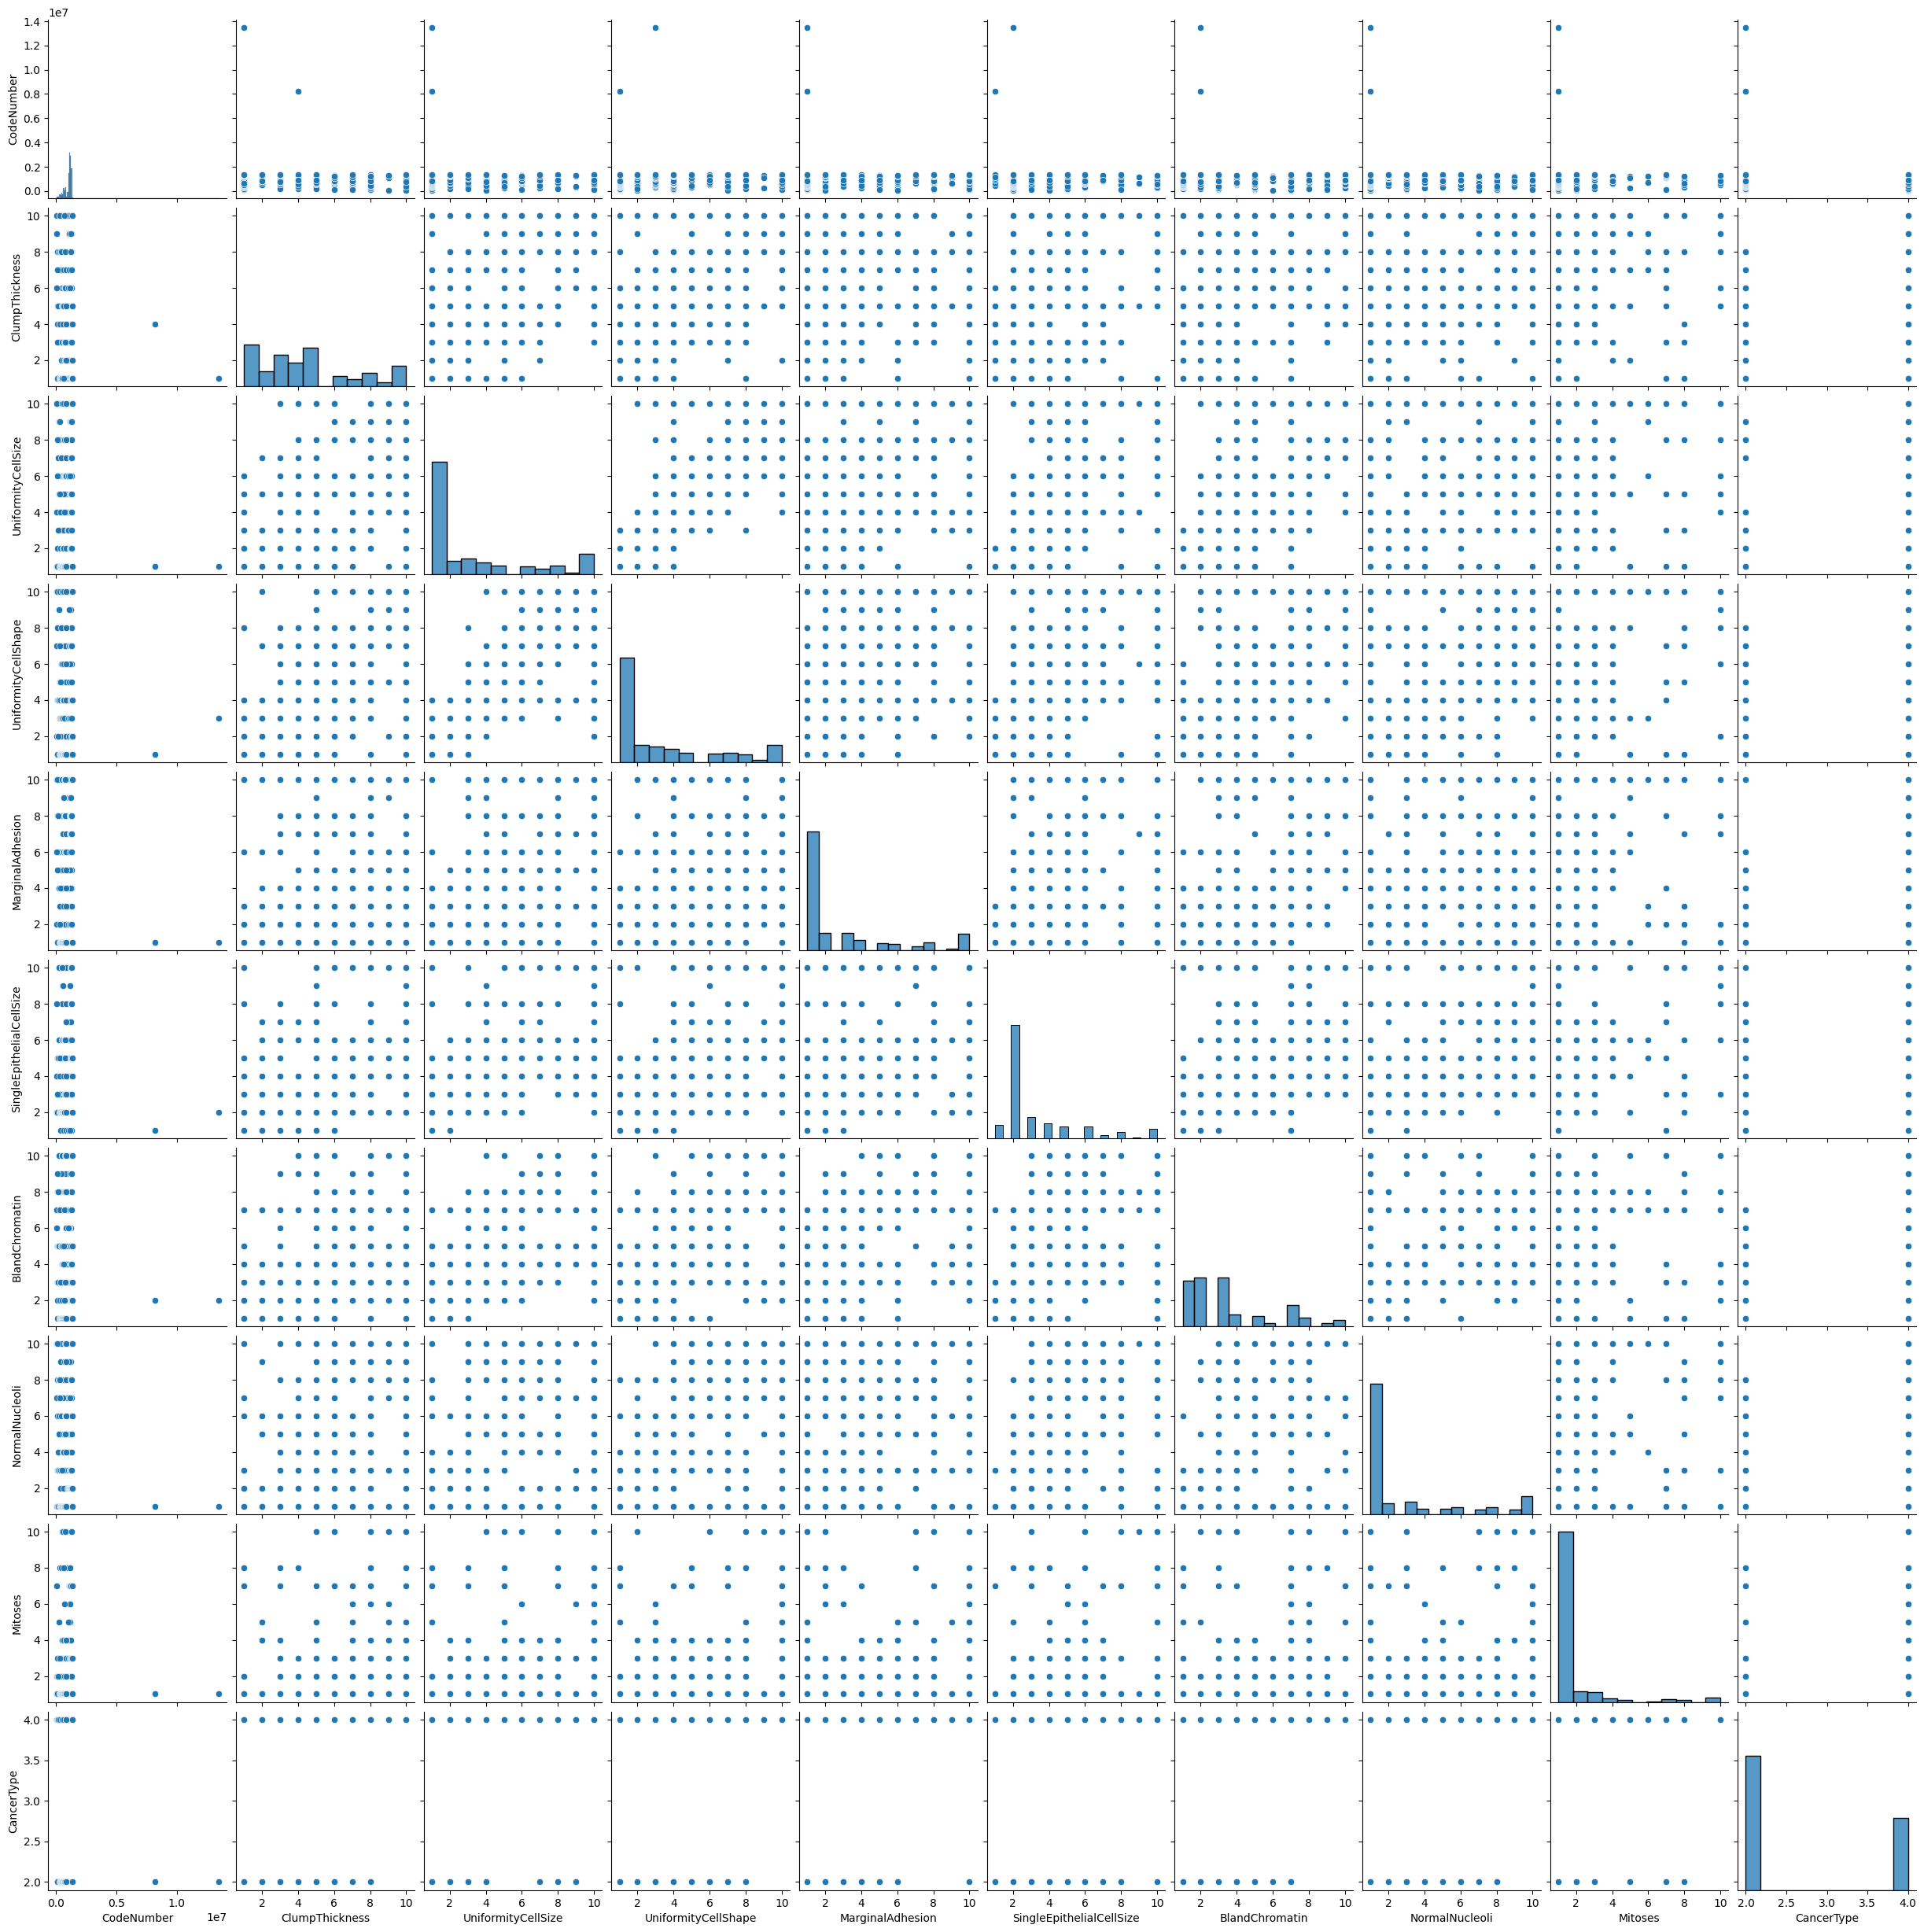

In [ ]:
sns.pairplot(df_compute);

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7375: FutureWarning: The default value of numeric_only will be `False` in a future version of Dask.
  assert isinstance(df, Series)


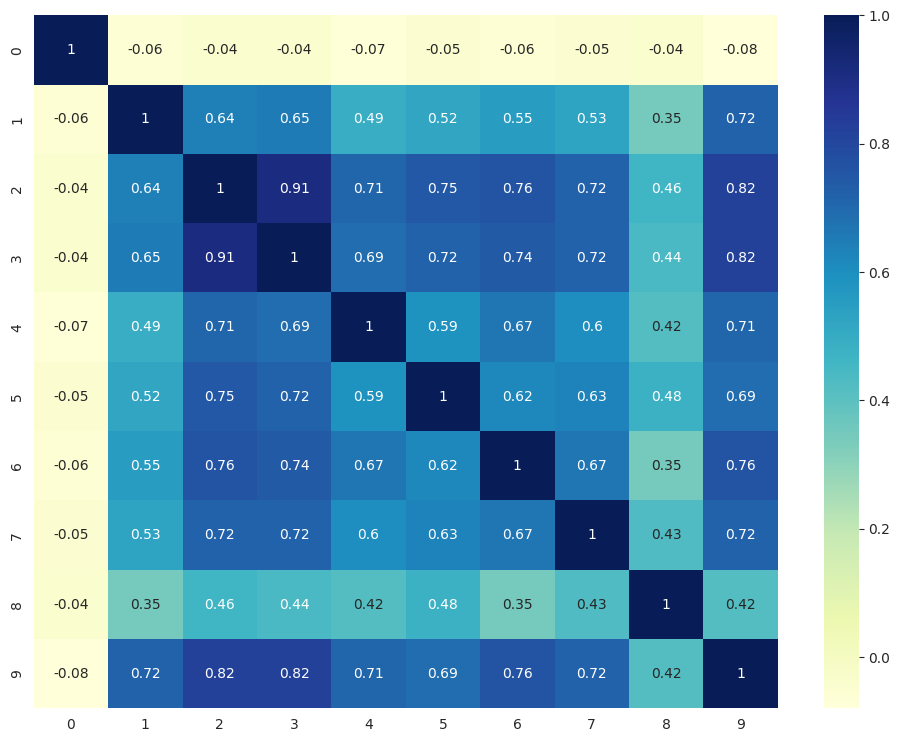

In [ ]:
plt.figure(figsize=(12, 9));
correlation_matrix =df.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

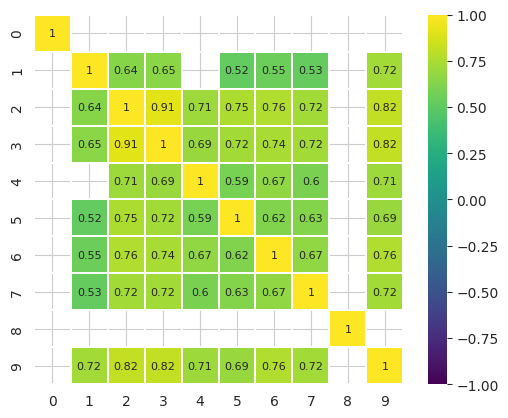

In [ ]:
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## breast-cancer.data

In [30]:
df=dd.read_csv('/content/breast-cancer.data',header=None)

In [ ]:
df.head(10)

0      1        2      3    4   5  6      7          8  \
0  no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left   left_low   
1  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   right_up   
2  no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   left_low   
3  no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right    left_up   
4  no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right  right_low   
5  no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   left_low   
6  no-recurrence-events  50-59  premeno  25-29  0-2  no  2   left   left_low   
7  no-recurrence-events  60-69     ge40  20-24  0-2  no  1   left   left_low   
8  no-recurrence-events  40-49  premeno  50-54  0-2  no  2   left   left_low   
9  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right    left_up   

    9  
0  no  
1  no  
2  no  
3  no  
4  no  
5  no  
6  no  
7  no  
8  no  
9  no

In [ ]:
for i in df.columns:
  if  pd.api.types.is_numeric_dtype(df[i]):
    print("Max of ",i,"  is: ",df[i].max().compute() )
    df[i].min().visualize()

    print("Min of ",i,"  is: ",df[i].min().compute() )


    print("Mean of ",i,"  is: ",df[i].mean().compute() )


    print("Std of ",i,"  is: ",df[i].std().compute() )

Max of  6   is:  3
Min of  6   is:  1
Mean of  6   is:  2.0489510489510487
Std of  6   is:  0.7382166403717156


In [ ]:
print("Type of the dataset: ", type(df))
print("Shape of data: ", df.shape)

Type of the dataset:  <class 'dask.dataframe.core.DataFrame'>
Shape of data:  (Delayed('int-0e556a18-ae52-4b0c-96be-83abf62cff8c'), 10)


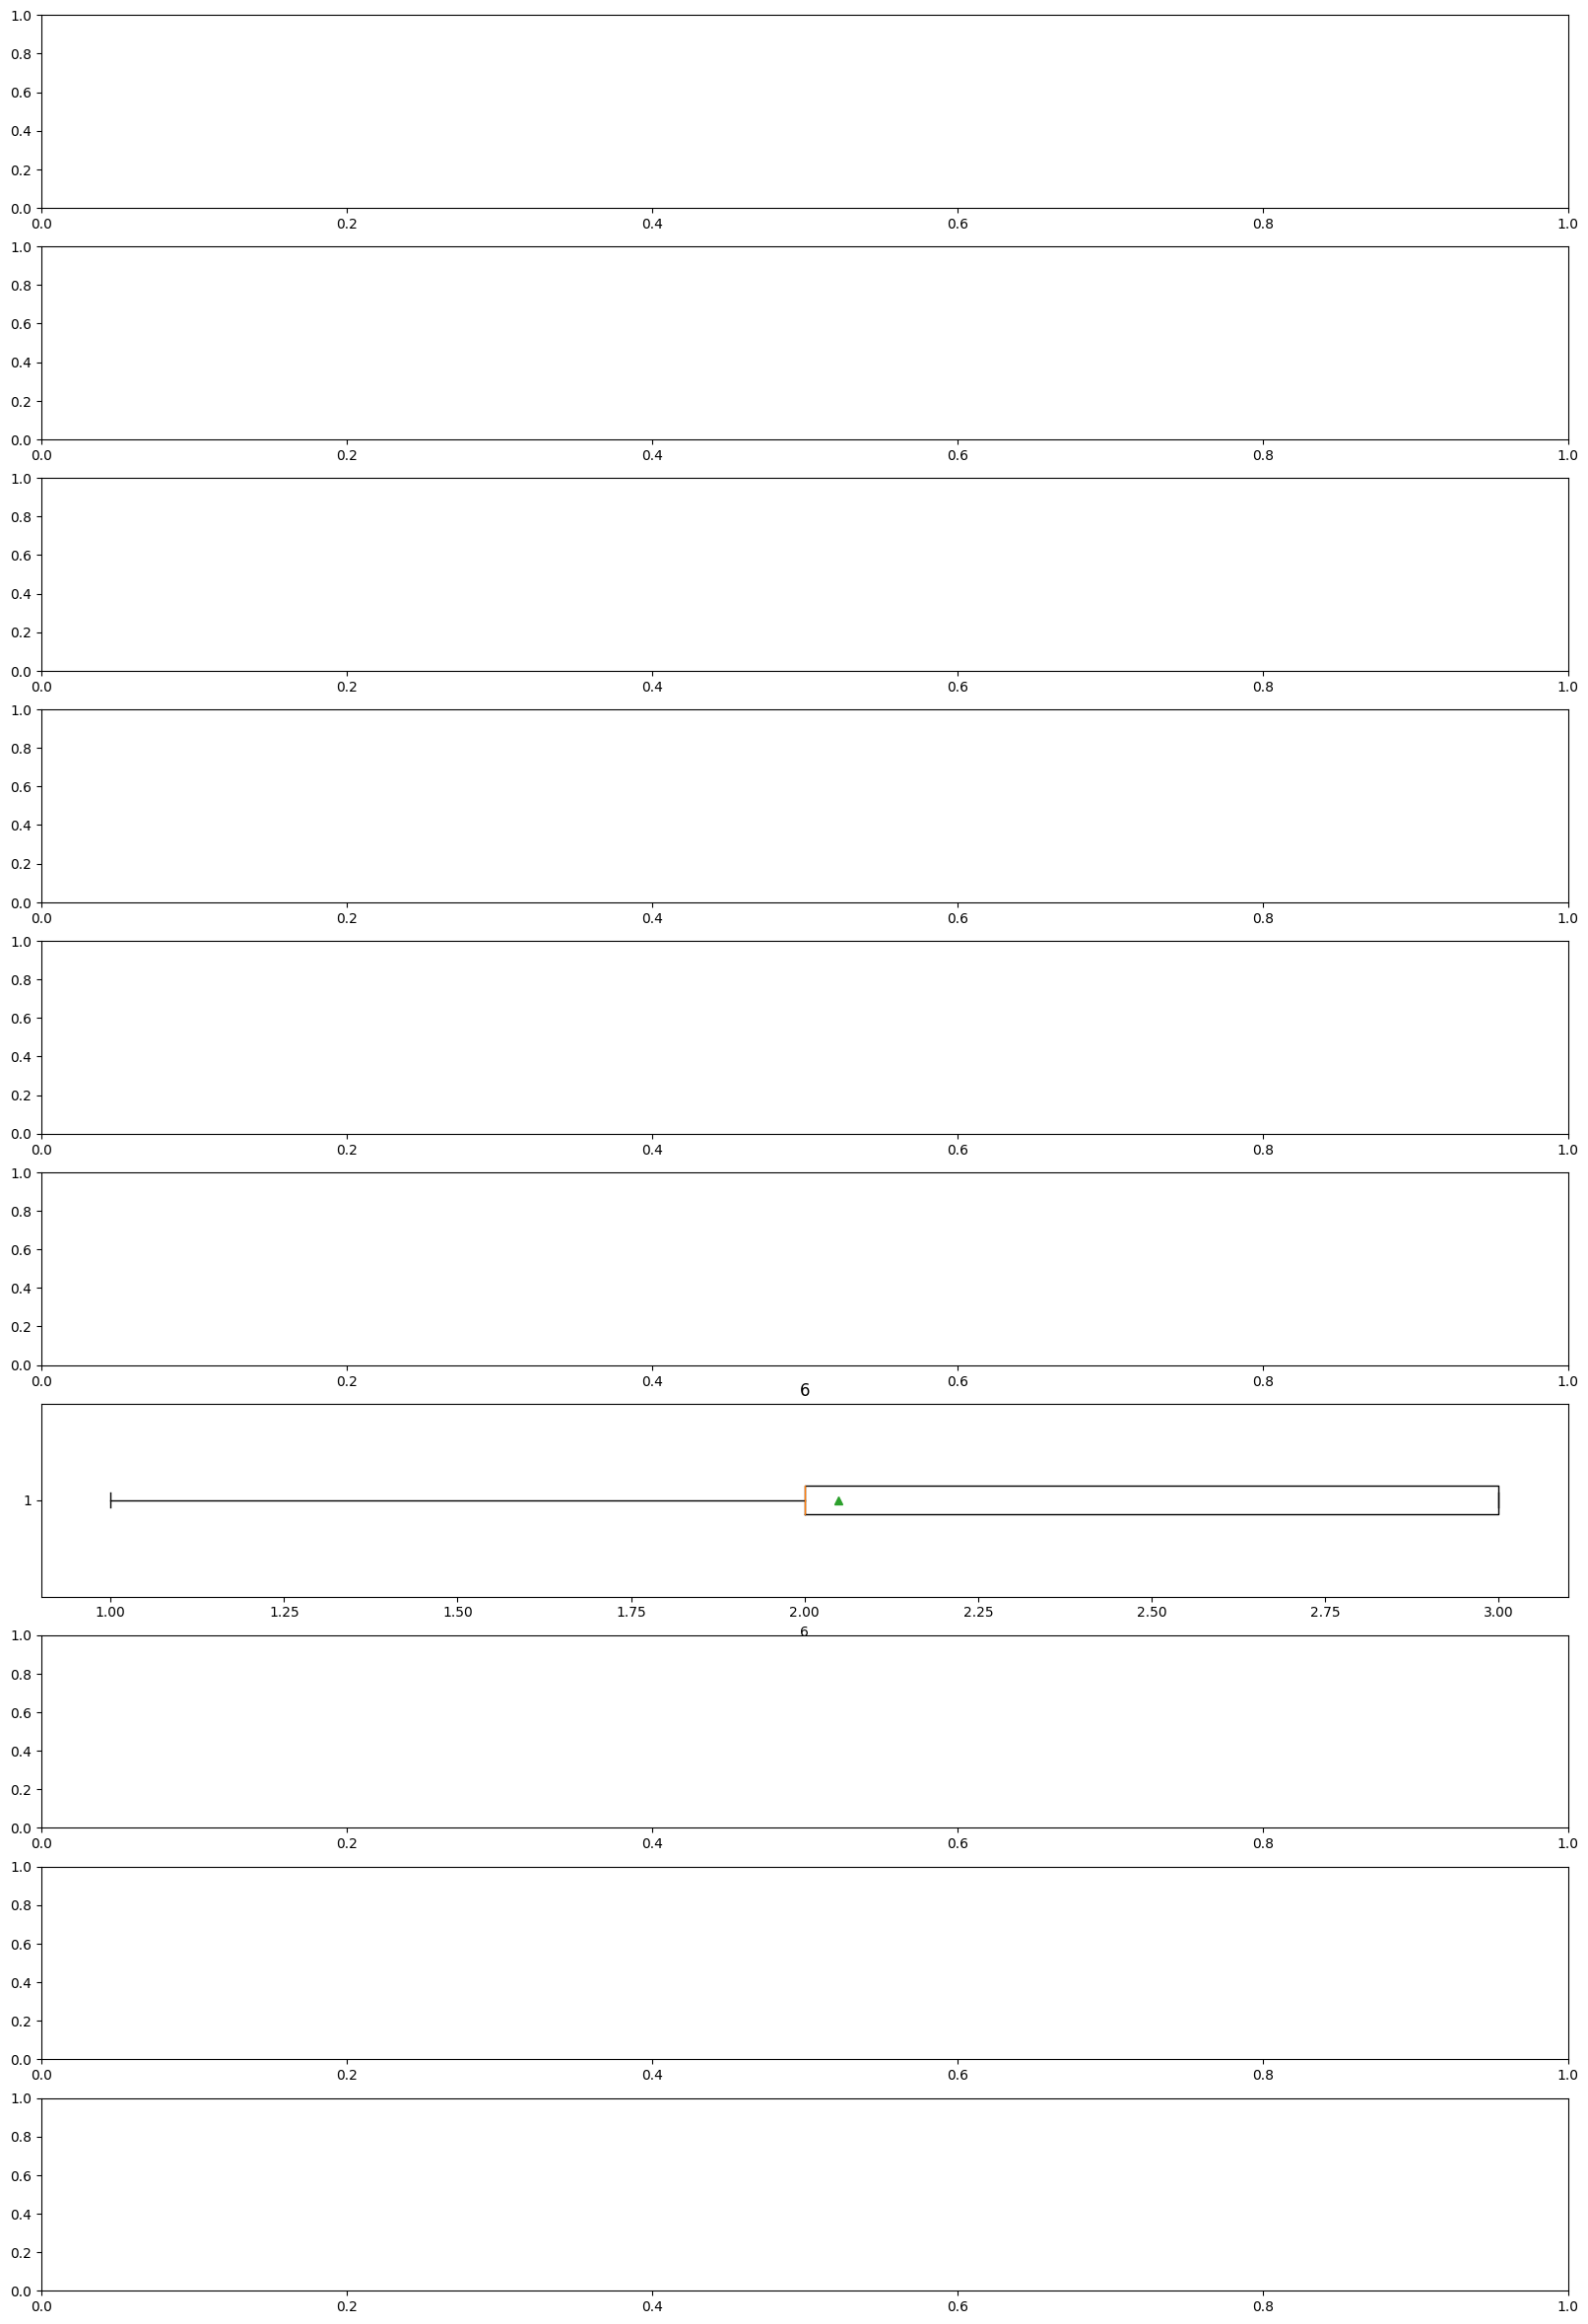

In [32]:
l=len(df.sum().compute())
import matplotlib.pyplot as plt
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
df_compute=df.compute()
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].boxplot(df[col],showmeans=True, vert=False)
    axes[i].set_xlabel(col)
    axes[i].set_title("{}".format(col))

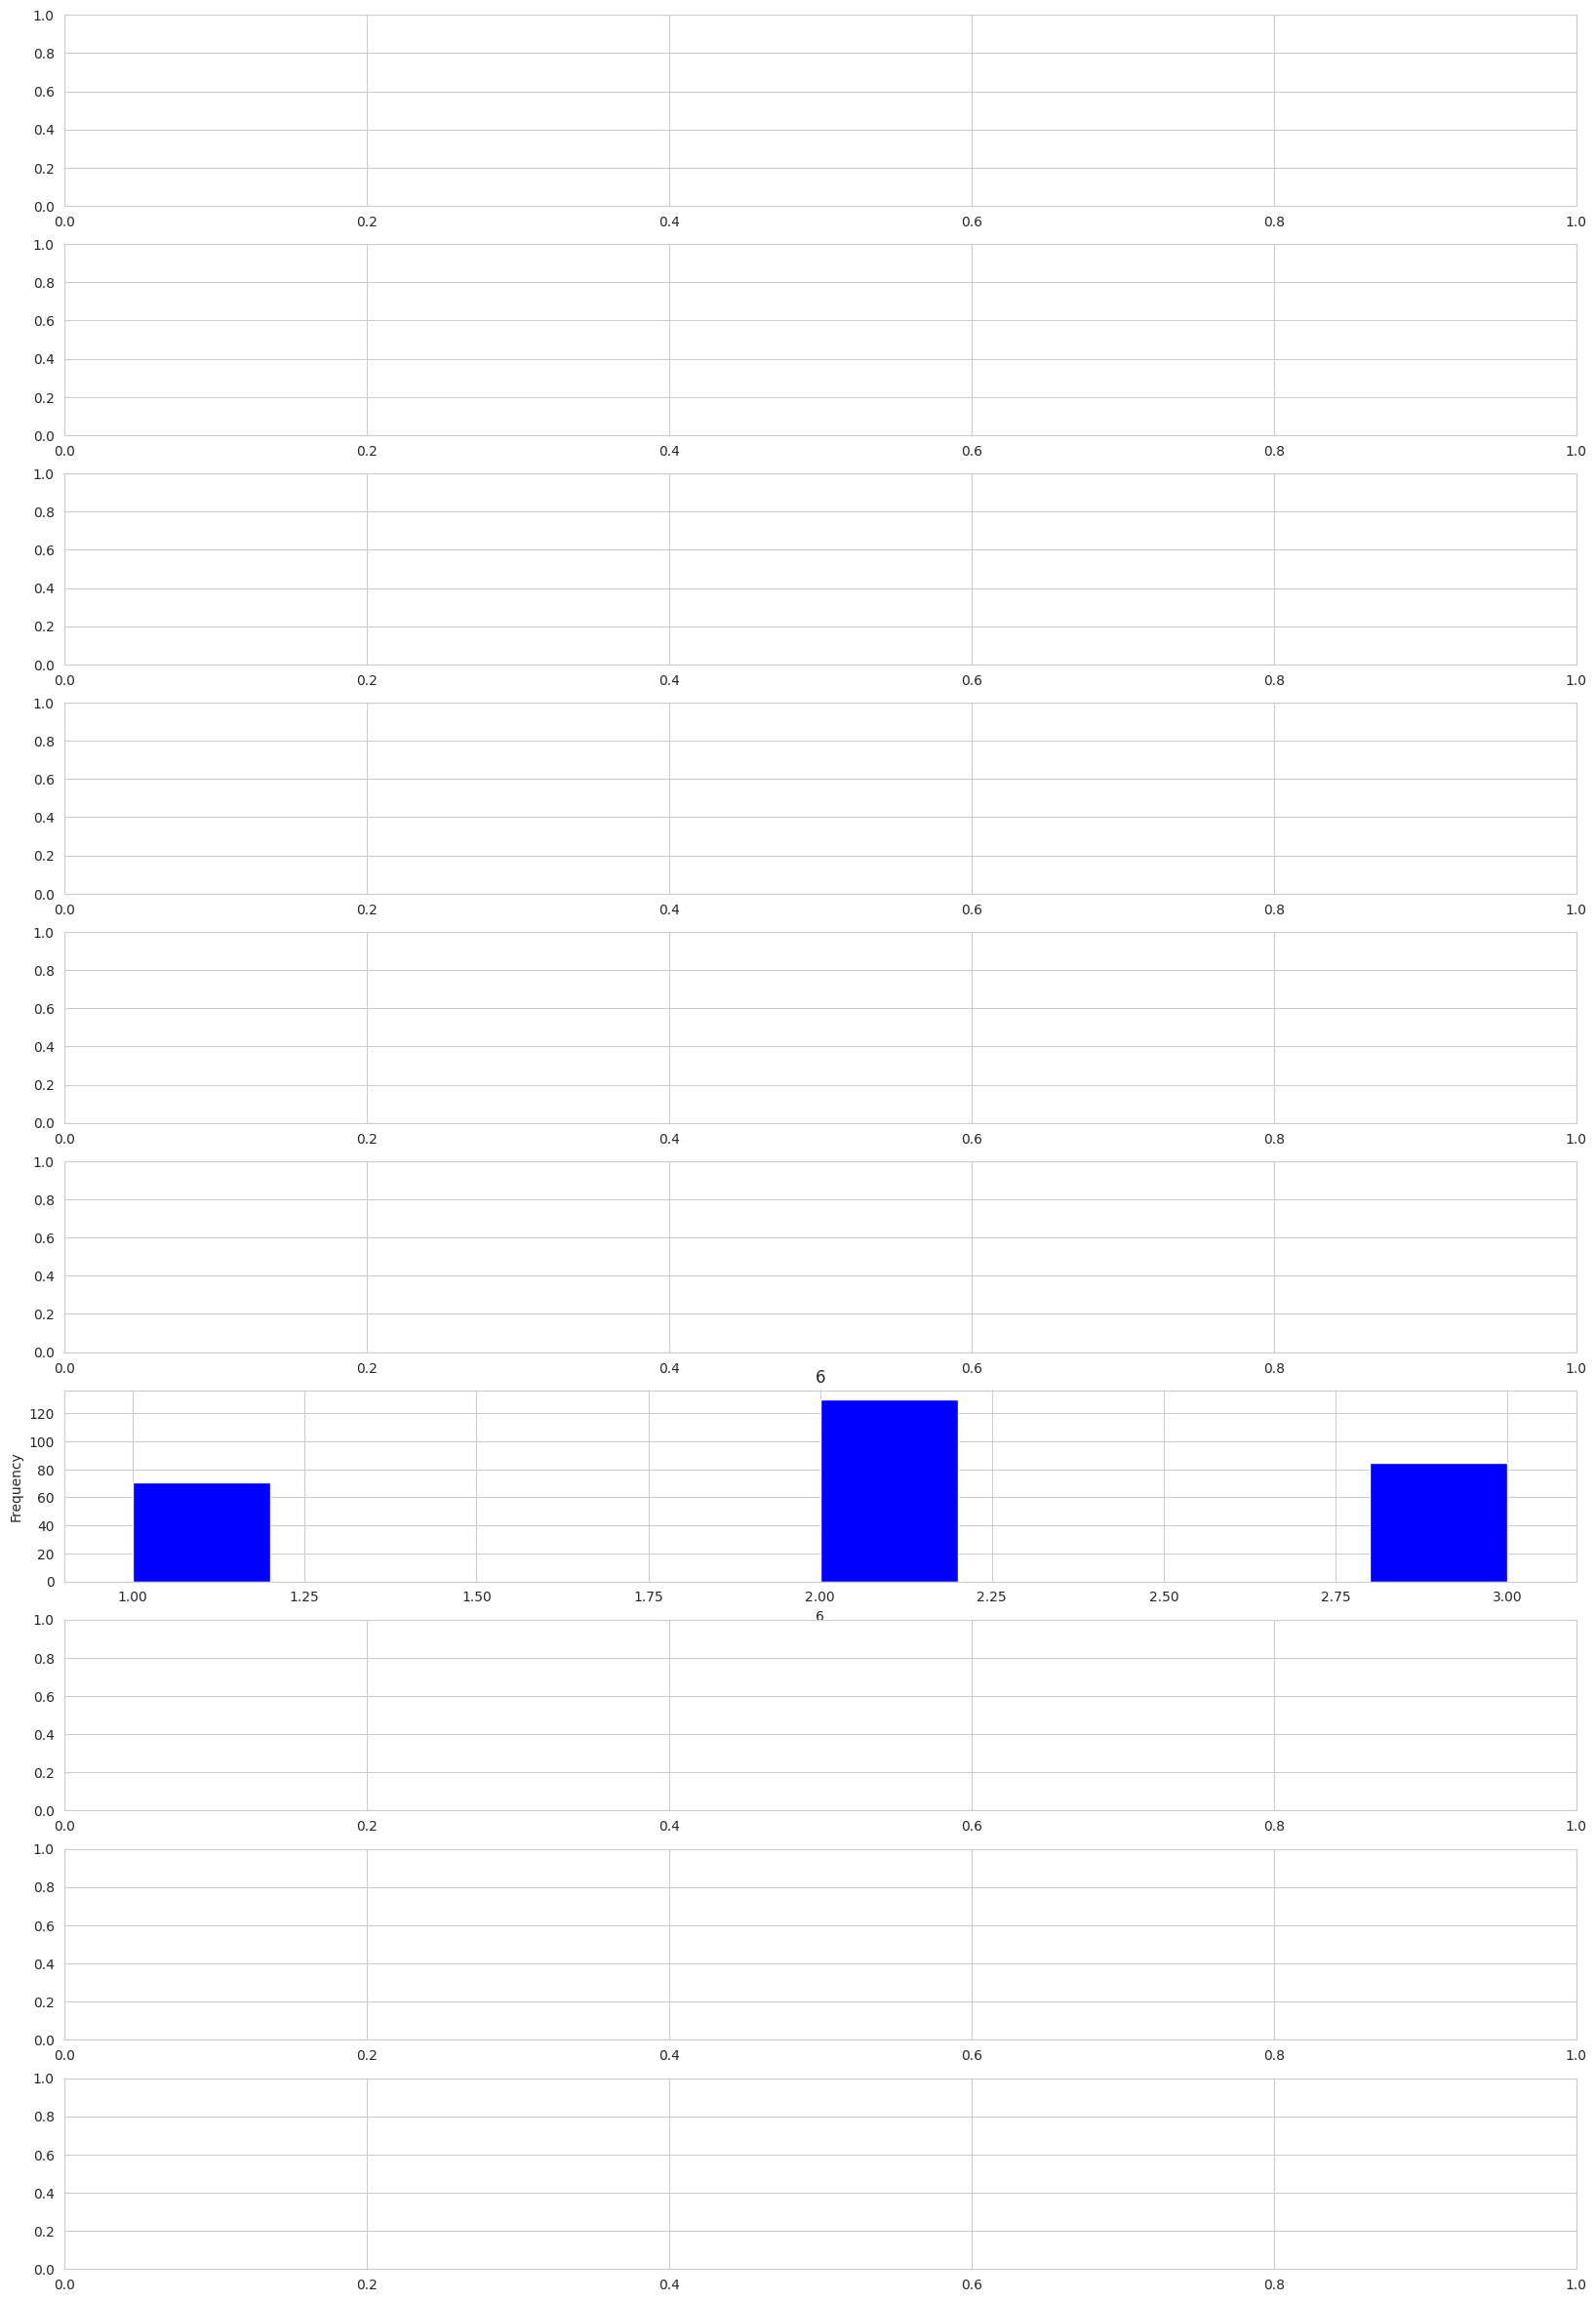

In [ ]:
labels = set()
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].hist(df[col], bins=10, color='blue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title("{}".format(col))

In [ ]:
print(df.nunique().head(20))

0     2
1     6
2     3
3    11
4     7
5     3
6     3
7     2
8     6
9     2
dtype: int64


In [ ]:
df.head(10)

0      1        2      3    4   5  6      7          8  \
0  no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left   left_low   
1  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   right_up   
2  no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   left_low   
3  no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right    left_up   
4  no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right  right_low   
5  no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   left_low   
6  no-recurrence-events  50-59  premeno  25-29  0-2  no  2   left   left_low   
7  no-recurrence-events  60-69     ge40  20-24  0-2  no  1   left   left_low   
8  no-recurrence-events  40-49  premeno  50-54  0-2  no  2   left   left_low   
9  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right    left_up   

    9  
0  no  
1  no  
2  no  
3  no  
4  no  
5  no  
6  no  
7  no  
8  no  
9  no

<ipython-input-287-3e4a8d217e7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[6], fit=stats.norm);


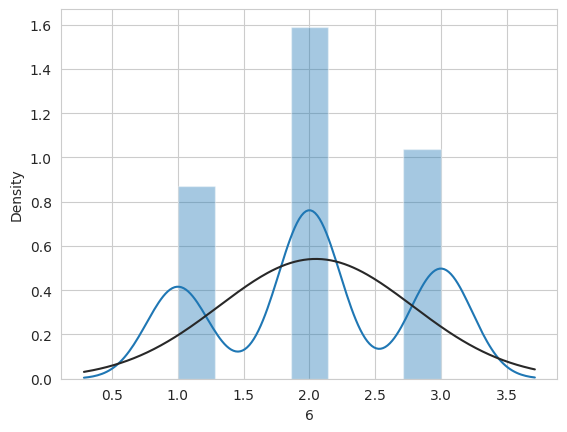

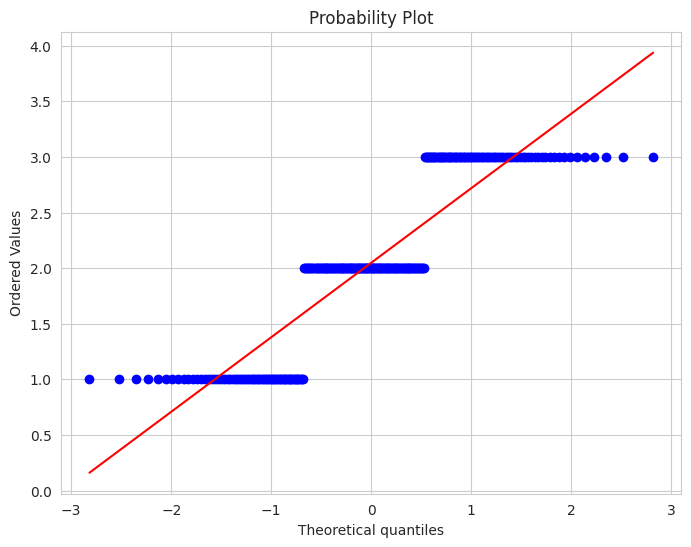

In [ ]:
from scipy.stats import norm
import scipy.stats as stats
sns.distplot(df[6], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(df[6], plot=plt);

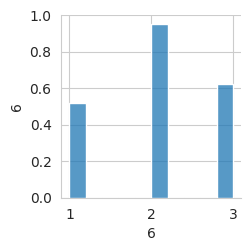

In [ ]:
sns.pairplot(df_compute);

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7375: FutureWarning: The default value of numeric_only will be `False` in a future version of Dask.
  assert isinstance(df, Series)


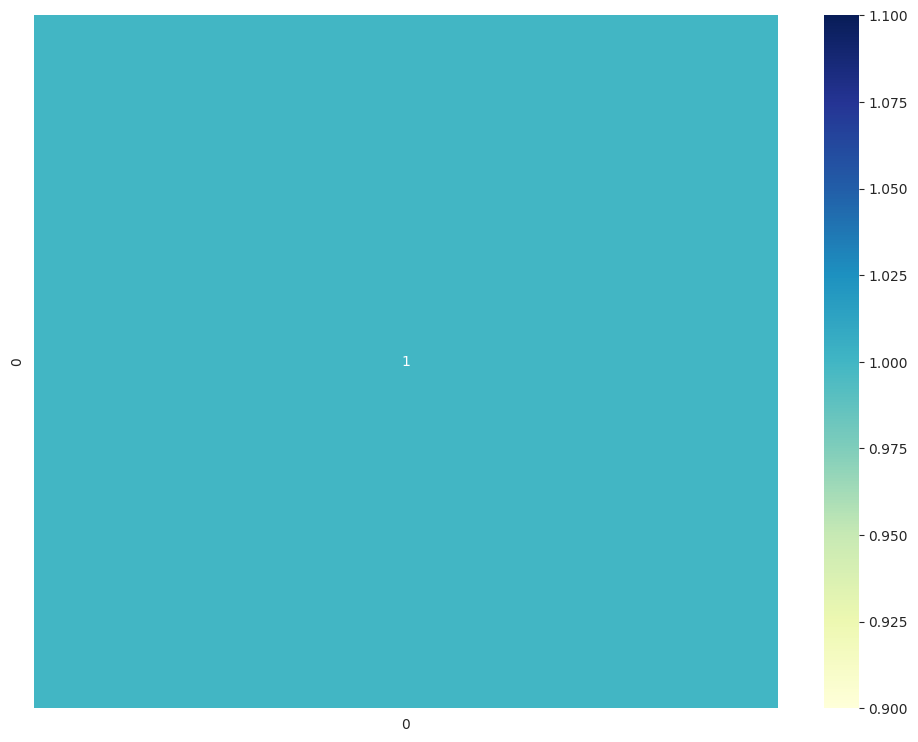

In [ ]:
plt.figure(figsize=(12, 9));
correlation_matrix =df.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

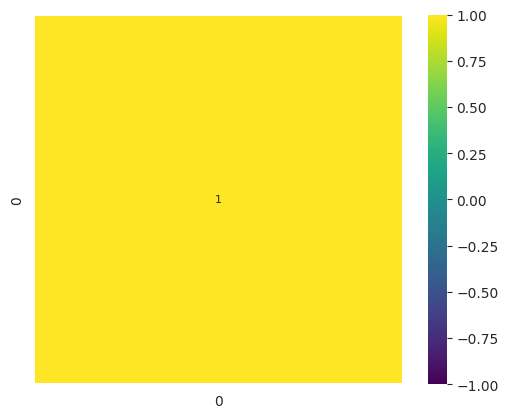

In [ ]:
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
!head -n 1 /content/breast-cancer-wisconsin.names > /content/breast-cancer-wisconsin.header
!cat /content/breast-cancer-wisconsin.header /content/breast-cancer-wisconsin.names > /content/breast-cancer-wisconsin.fixed

In [33]:
from sklearn.cluster import KMeans
from joblib import parallel_backend
# Select only the numeric columns
df_numeric = df_compute.select_dtypes (include= ['number'])

# Or convert categorical columns into dummy variables
df_dummies = pd.get_dummies (df_compute)

# Then pass the modified dataframe to the KMeans algorithm
with parallel_backend ('dask'):
    km = KMeans (n_clusters=3)
    km.fit (df_numeric) # or df_dummies
    labels = km.predict (df_numeric) # or df_dummies
#I do not know why the dask_ml.cluster can not import
print(labels)

[2 1 1 1 1 1 1 0 1 1 2 1 0 2 2 0 1 2 2 0 1 1 1 1 1 1 0 2 1 1 2 1 2 0 0 1 1
 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 2 0 0 0 1 0 0 1 0 0 1 0 0 0 2 2 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 0 2 1 0 2 0 1 2 1 1 0 1 1 1 0 1 2 2 1 1 1 0 1 1 2 0 0
 0 1 0 1 1 0 2 0 0 0 1 2 0 0 1 1 1 1 1 1 2 1 2 1 1 2 0 1 1 1 1 0 1 2 1 1 1
 2 2 2 2 2 2 2 1 2 0 0 0 2 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 2 2 0 2 2
 1 0 1 1 1 2 1 1 1 1 1 0 1 1 0 2 1 0 1 1 1 2 1 2 0 1 1 2 0 1 1 1 1 2 0 2 0
 2 2 2 2 2 2 2 0 1 1 2 0 2 2 1 1 2 1 1 2 2 2 2 1 2 2 2 1 2 1 0 2 2 2 0 1 1
 2 1 2 2 0 0 2 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2 1 2 0 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## breast-cancer-wisconsin.data

In [34]:
df=dd.read_csv('/content/breast-cancer-wisconsin.data',dtype={'BareNuclei': 'object'})

In [38]:
df2=dd.read_csv('/content/breast-cancer-wisconsin.csv',dtype={'BareNuclei': 'object'})

In [39]:
df.head(5)

CodeNumber  ClumpThickness  UniformityCellSize  UniformityCellShape  \
0     1002945               5                   4                    4   
1     1015425               3                   1                    1   
2     1016277               6                   8                    8   
3     1017023               4                   1                    1   
4     1017122               8                  10                   10   

   MarginalAdhesion  SingleEpithelialCellSize BareNuclei  BlandChromatin  \
0                 5                         7         10               3   
1                 1                         2          2               3   
2                 1                         3          4               3   
3                 3                         2          1               3   
4                 8                         7         10               9   

   NormalNucleoli  Mitoses  CancerType  
0               2        1           2  
1               1        1           2  
2               7        1           2  
3               1        1           2  
4               7        1           4

In [40]:
df2.head(5)
#2 data is the same so i do it in 1

CodeNumber  ClumpThickness  UniformityCellSize  UniformityCellShape  \
0     1002945               5                   4                    4   
1     1015425               3                   1                    1   
2     1016277               6                   8                    8   
3     1017023               4                   1                    1   
4     1017122               8                  10                   10   

   MarginalAdhesion  SingleEpithelialCellSize BareNuclei  BlandChromatin  \
0                 5                         7         10               3   
1                 1                         2          2               3   
2                 1                         3          4               3   
3                 3                         2          1               3   
4                 8                         7         10               9   

   NormalNucleoli  Mitoses  CancerType  
0               2        1           2  
1               1        1           2  
2               7        1           2  
3               1        1           2  
4               7        1           4

In [ ]:

df=df.dropna()
for i in df.columns:
  if  pd.api.types.is_numeric_dtype(df[i]):
    df[i]=df[i].fillna(df[i].mean())

In [ ]:
for i in df.columns:
  if  pd.api.types.is_numeric_dtype(df[i]):
    print("Max of ",i,"  is: ",df[i].max().compute() )
    df[i].min().visualize()

    print("Min of ",i,"  is: ",df[i].min().compute() )


    print("Mean of ",i,"  is: ",df[i].mean().compute() )


    print("Std of ",i,"  is: ",df[i].std().compute() )

Max of  CodeNumber   is:  13454352
Min of  CodeNumber   is:  61634
Mean of  CodeNumber   is:  1071806.7908309456
Std of  CodeNumber   is:  617532.2740294789
Max of  ClumpThickness   is:  10
Min of  ClumpThickness   is:  1
Mean of  ClumpThickness   is:  4.416905444126074
Std of  ClumpThickness   is:  2.8176733983653146
Max of  UniformityCellSize   is:  10
Min of  UniformityCellSize   is:  1
Mean of  UniformityCellSize   is:  3.1375358166189113
Std of  UniformityCellSize   is:  3.052575308453486
Max of  UniformityCellShape   is:  10
Min of  UniformityCellShape   is:  1
Mean of  UniformityCellShape   is:  3.2106017191977076
Std of  UniformityCellShape   is:  2.9728666675080464
Max of  MarginalAdhesion   is:  10
Min of  MarginalAdhesion   is:  1
Mean of  MarginalAdhesion   is:  2.80945558739255
Std of  MarginalAdhesion   is:  2.8566059244560345
Max of  SingleEpithelialCellSize   is:  10
Min of  SingleEpithelialCellSize   is:  1
Mean of  SingleEpithelialCellSize   is:  3.2177650429799427
St

In [ ]:
print("Type of the dataset: ", type(df))
print("Shape of data: ", df.shape)

Type of the dataset:  <class 'dask.dataframe.core.DataFrame'>
Shape of data:  (Delayed('int-47871400-2f41-478a-a34a-4749ce5bb787'), 11)


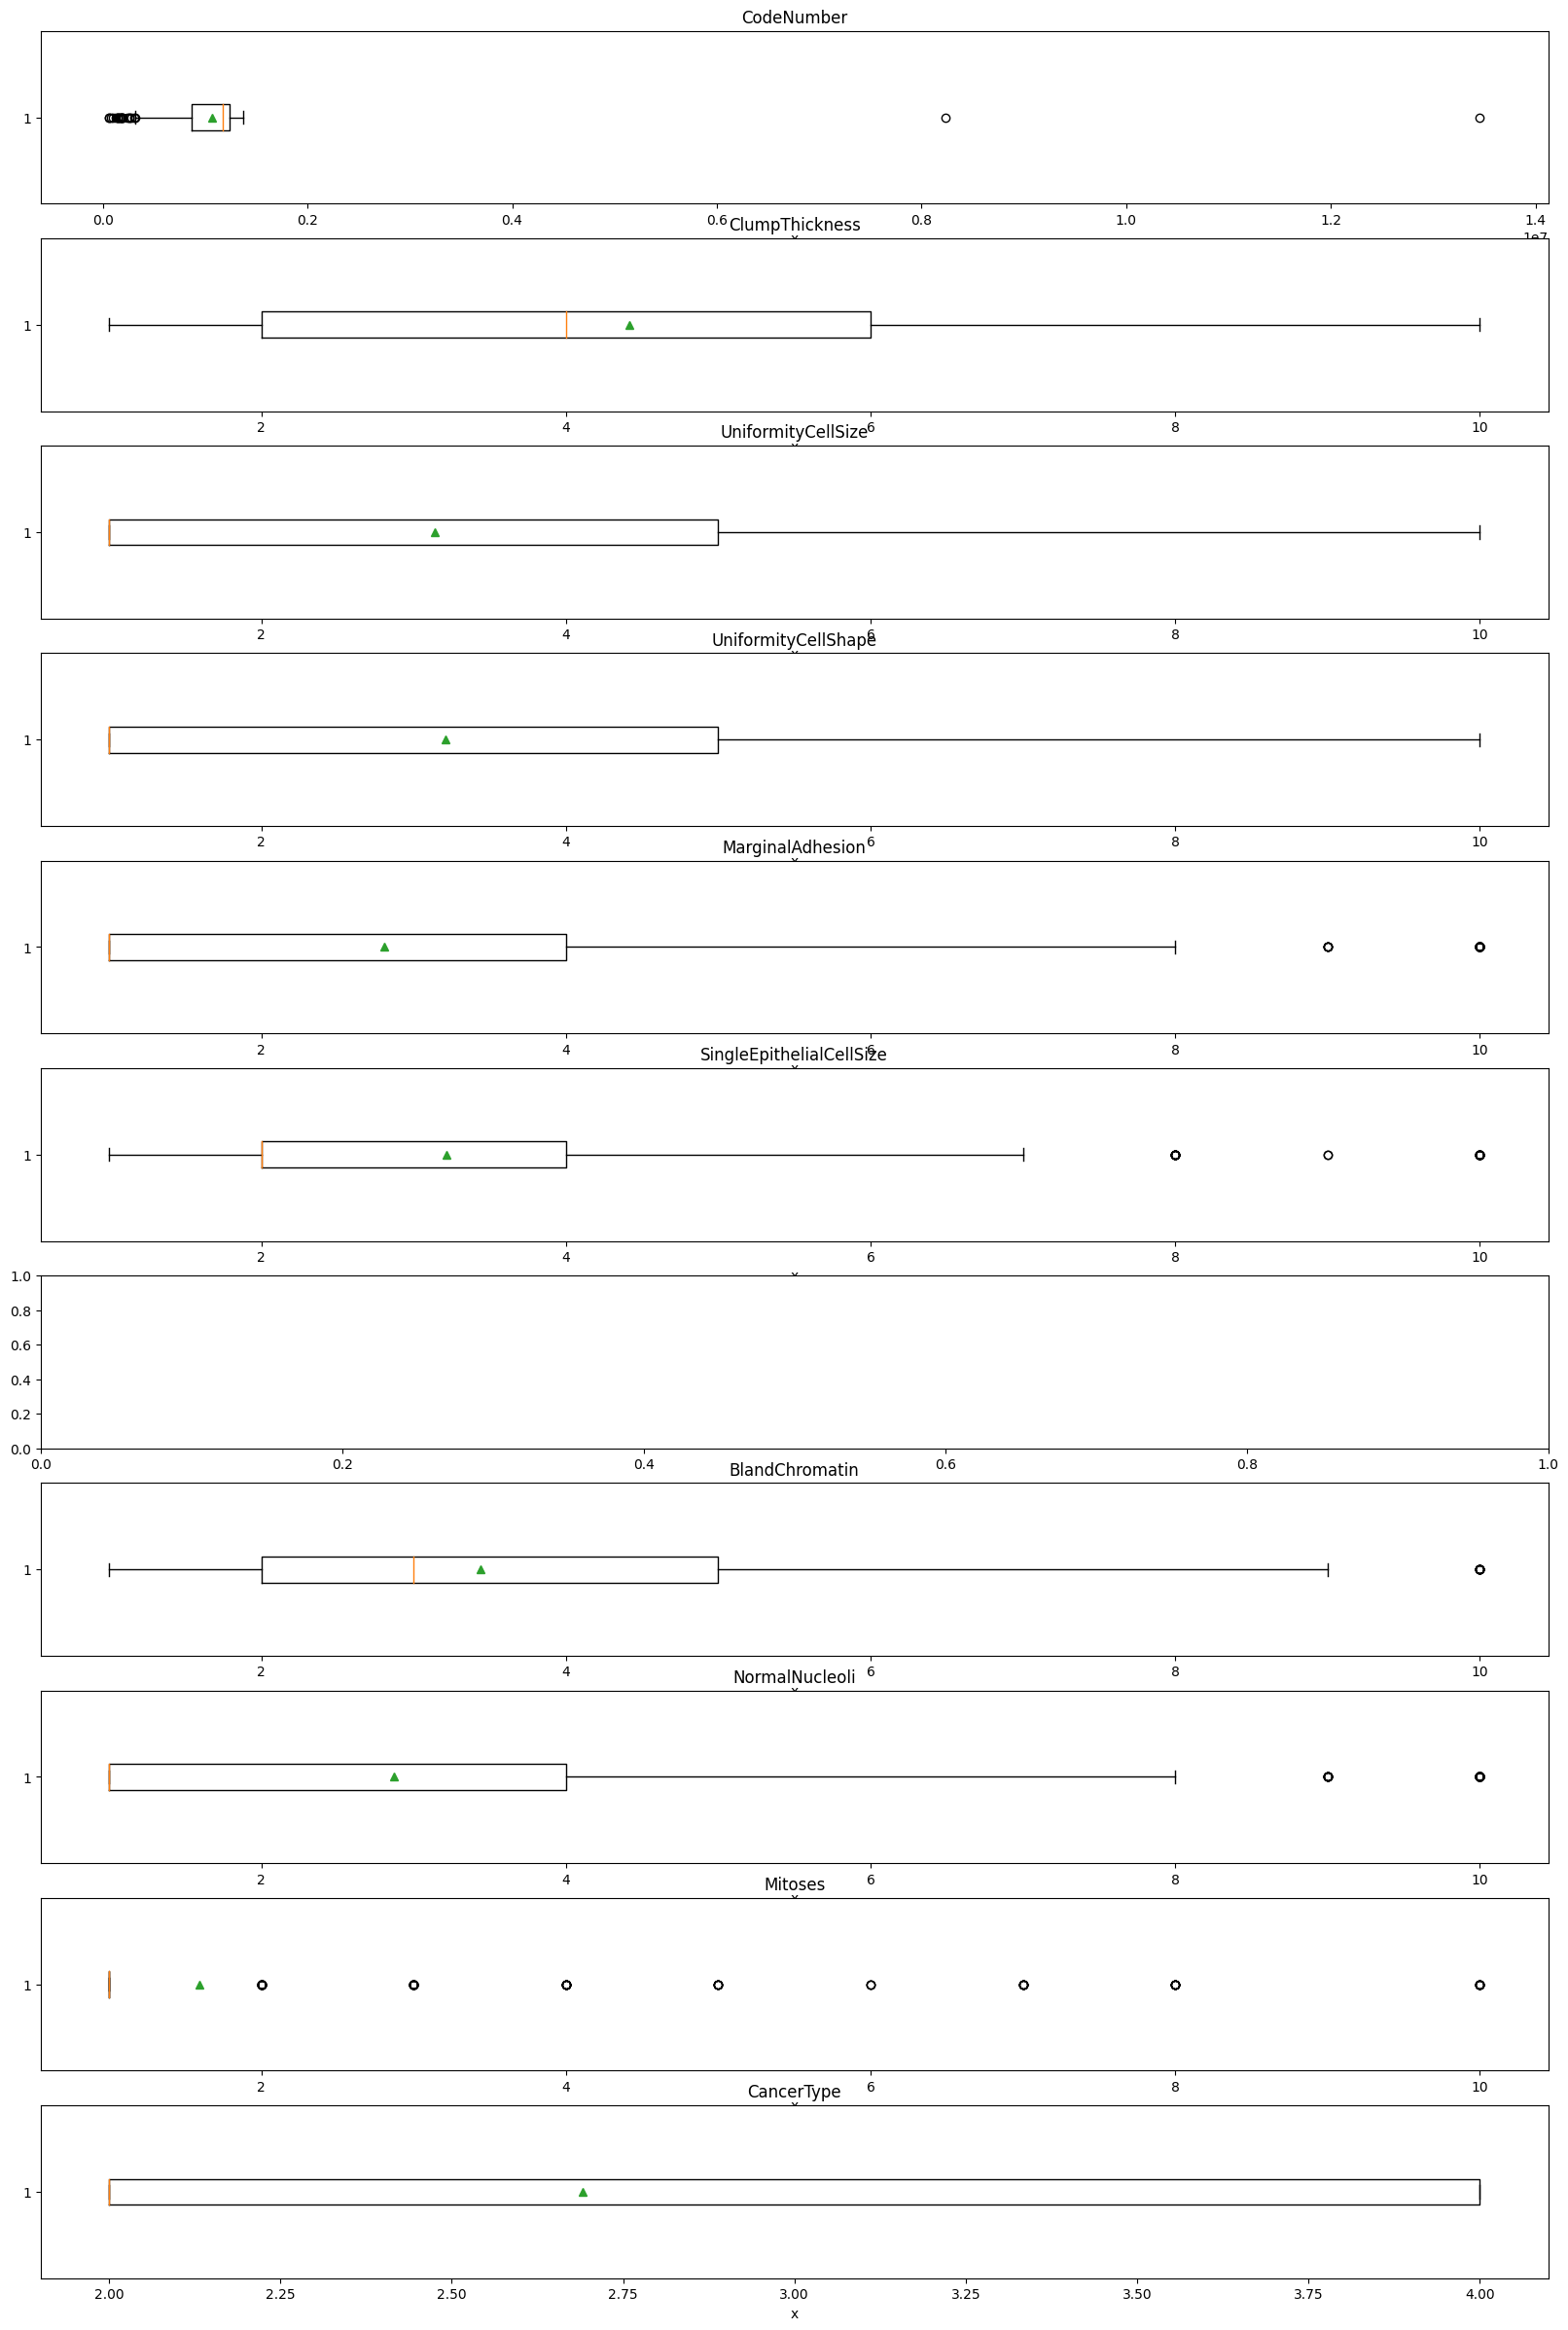

In [35]:
l=len(df.sum().compute())
import matplotlib.pyplot as plt
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
df_compute=df.compute()
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].boxplot(df[col],showmeans=True, vert=False)
    axes[i].set_xlabel('x')
    axes[i].set_title("{}".format(col))

INFO:distributed.utils_perf:full garbage collection released 58.57 MiB from 29001 reference cycles (threshold: 9.54 MiB)


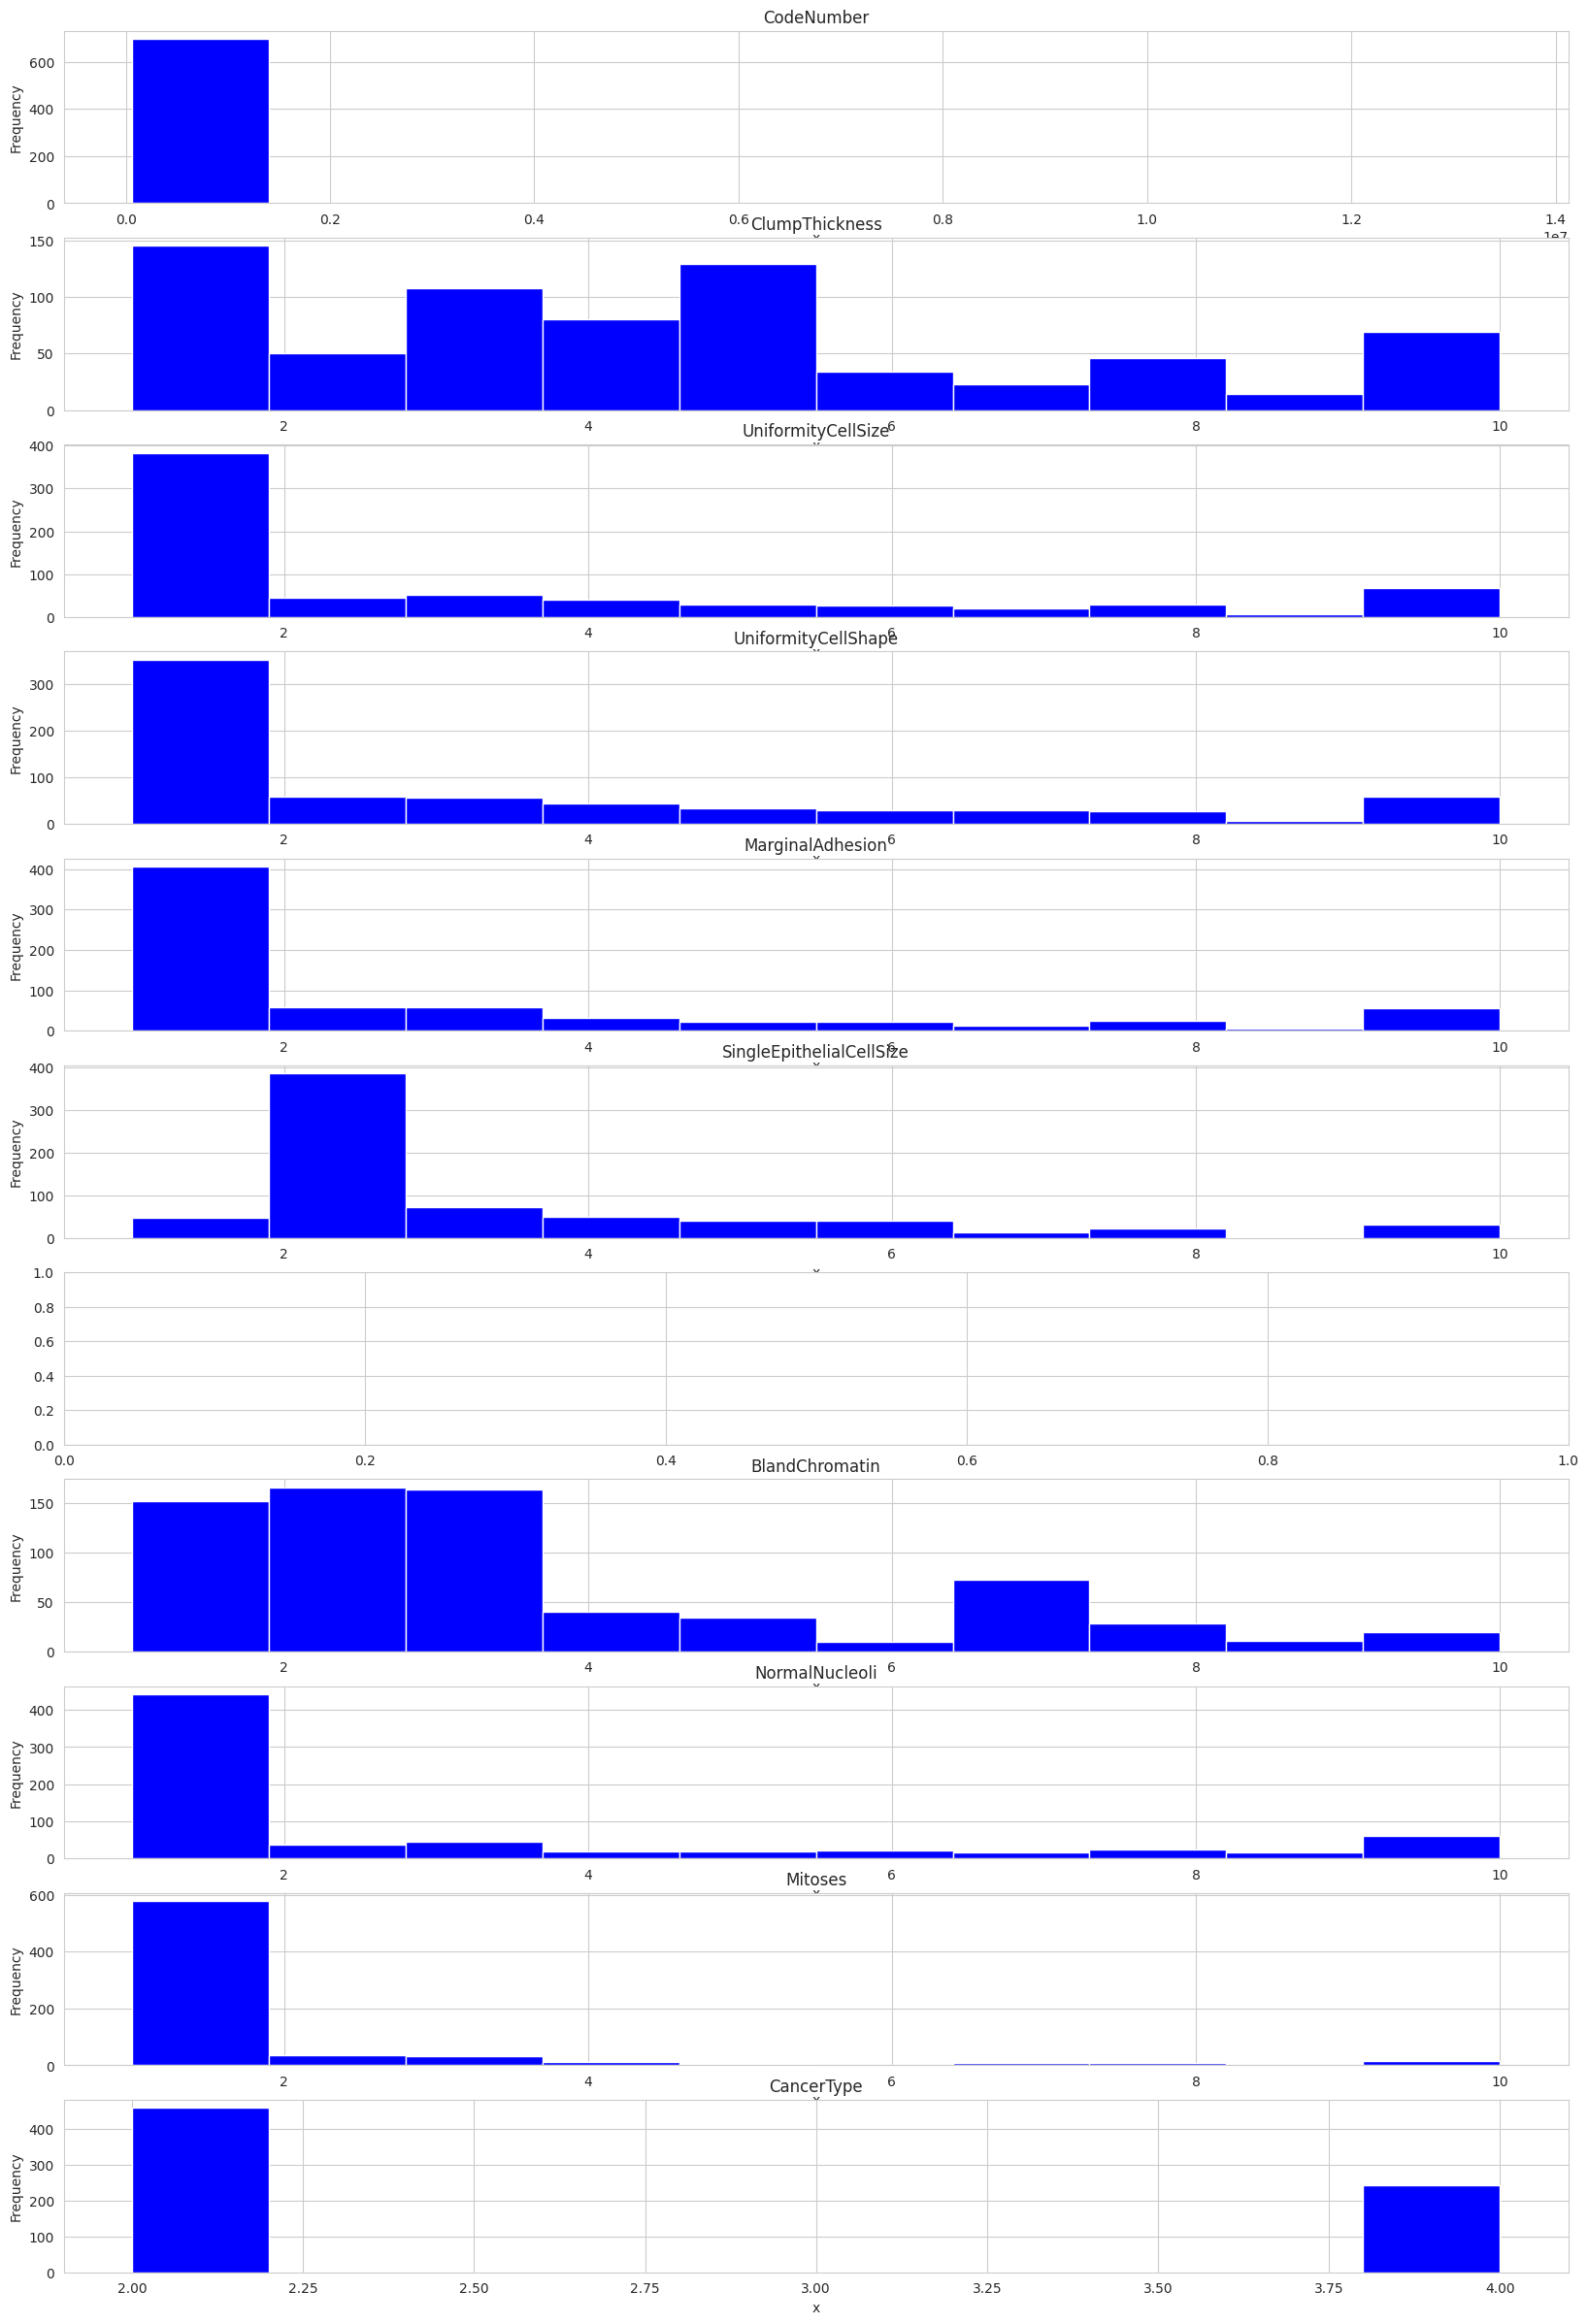

In [ ]:
labels = set()
fig, axes = plt.subplots(l, 1, figsize=(20, 30))
for i, col in enumerate(df_compute.columns):
  if   pd.api.types.is_numeric_dtype(df[col]):
    axes[i].hist(df[col], bins=10, color='blue')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title("{}".format(col))

In [ ]:
df.describe(include='all').head(20)

CodeNumber  ClumpThickness  UniformityCellSize  UniformityCellShape  \
unique           NaN             NaN                 NaN                  NaN   
count   6.980000e+02      698.000000          698.000000           698.000000   
top              NaN             NaN                 NaN                  NaN   
freq             NaN             NaN                 NaN                  NaN   
mean    1.071807e+06        4.416905            3.137536             3.210602   
std     6.175323e+05        2.817673            3.052575             2.972867   
min     6.163400e+04        1.000000            1.000000             1.000000   
25%     8.702582e+05        2.000000            1.000000             1.000000   
50%     1.171710e+06        4.000000            1.000000             1.000000   
75%     1.238354e+06        6.000000            5.000000             5.000000   
max     1.345435e+07       10.000000           10.000000            10.000000   

        MarginalAdhesion  SingleEpithelialCellSize BareNuclei  BlandChromatin  \
unique               NaN                       NaN         11             NaN   
count         698.000000                698.000000        698      698.000000   
top                  NaN                       NaN          1             NaN   
freq                 NaN                       NaN        401             NaN   
mean            2.809456                  3.217765        NaN        3.438395   
std             2.856606                  2.215408        NaN        2.440056   
min             1.000000                  1.000000        NaN        1.000000   
25%             1.000000                  2.000000        NaN        2.000000   
50%             1.000000                  2.000000        NaN        3.000000   
75%             4.000000                  4.000000        NaN        5.000000   
max            10.000000                 10.000000        NaN       10.000000   

        NormalNucleoli     Mitoses  CancerType  
unique             NaN         NaN         NaN  
count       698.000000  698.000000  698.000000  
top                NaN         NaN         NaN  
freq               NaN         NaN         NaN  
mean          2.869628    1.590258    2.690544  
std           3.055004    1.716162    0.951596  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

In [ ]:
print(df.nunique().head(20))

CodeNumber                  644
ClumpThickness               10
UniformityCellSize           10
UniformityCellShape          10
MarginalAdhesion             10
SingleEpithelialCellSize     10
BareNuclei                   11
BlandChromatin               10
NormalNucleoli               10
Mitoses                       9
CancerType                    2
dtype: int64


In [ ]:
df.head(10)

CodeNumber  ClumpThickness  UniformityCellSize  UniformityCellShape  \
0     1002945               5                   4                    4   
1     1015425               3                   1                    1   
2     1016277               6                   8                    8   
3     1017023               4                   1                    1   
4     1017122               8                  10                   10   
5     1018099               1                   1                    1   
6     1018561               2                   1                    2   
7     1033078               2                   1                    1   
8     1033078               4                   2                    1   
9     1035283               1                   1                    1   

   MarginalAdhesion  SingleEpithelialCellSize BareNuclei  BlandChromatin  \
0                 5                         7         10               3   
1                 1                         2          2               3   
2                 1                         3          4               3   
3                 3                         2          1               3   
4                 8                         7         10               9   
5                 1                         2         10               3   
6                 1                         2          1               3   
7                 1                         2          1               1   
8                 1                         2          1               2   
9                 1                         1          1               3   

   NormalNucleoli  Mitoses  CancerType  
0               2        1           2  
1               1        1           2  
2               7        1           2  
3               1        1           2  
4               7        1           4  
5               1        1           2  
6               1        1           2  
7               1        5           2  
8               1        1           2  
9               1        1           2

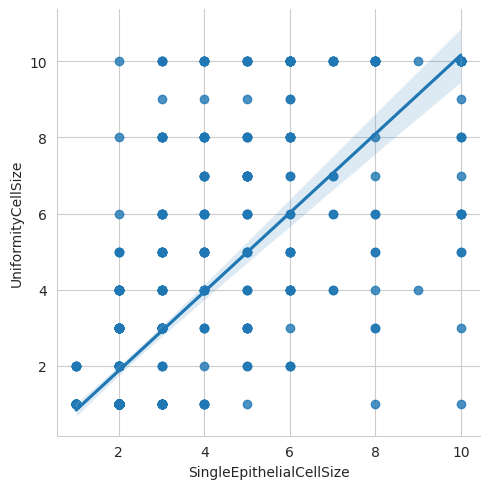

In [ ]:
import seaborn as sns
df_compute=df.compute()
sns.lmplot(x = 'SingleEpithelialCellSize', y = 'UniformityCellSize', data = df_compute)

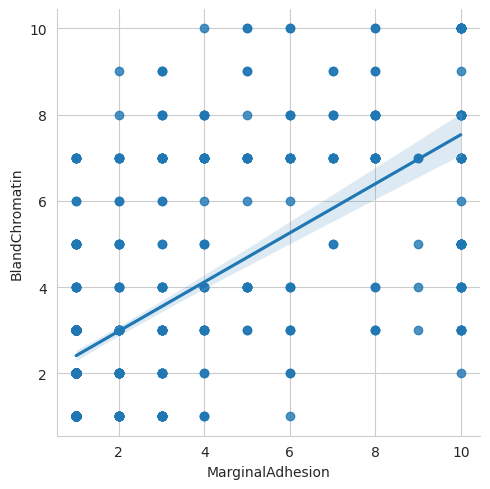

In [ ]:
sns.lmplot(x = 'MarginalAdhesion', y = 'BlandChromatin', data = df_compute)

<ipython-input-319-cea60c699f4a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UniformityCellSize'], fit=stats.norm);


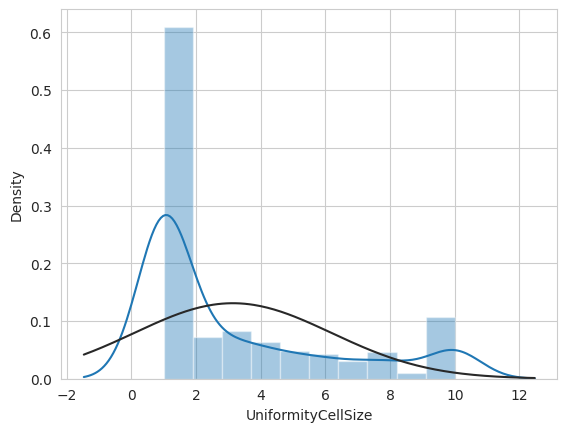

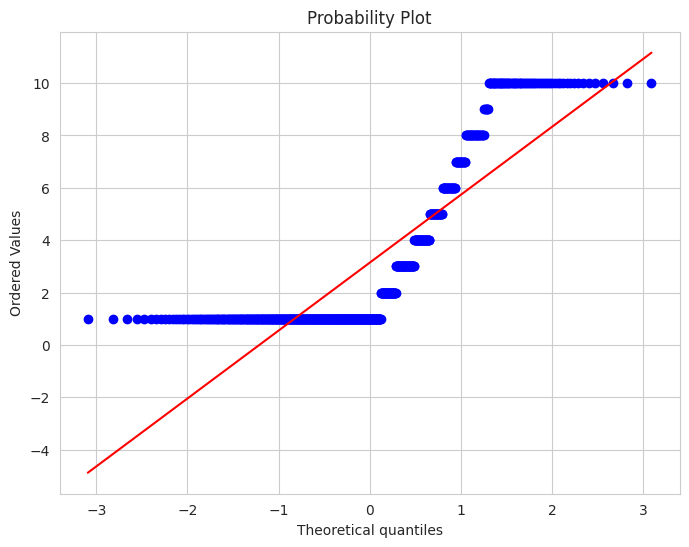

In [ ]:
from scipy.stats import norm
import scipy.stats as stats
sns.distplot(df['UniformityCellSize'], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(df['UniformityCellSize'], plot=plt);

<ipython-input-323-d71bfbecab7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BlandChromatin'], fit=stats.norm);


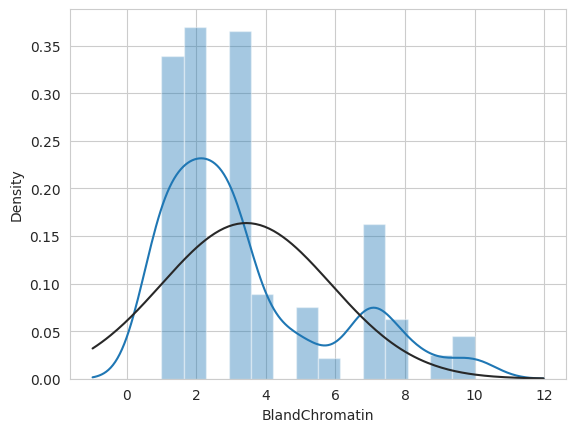

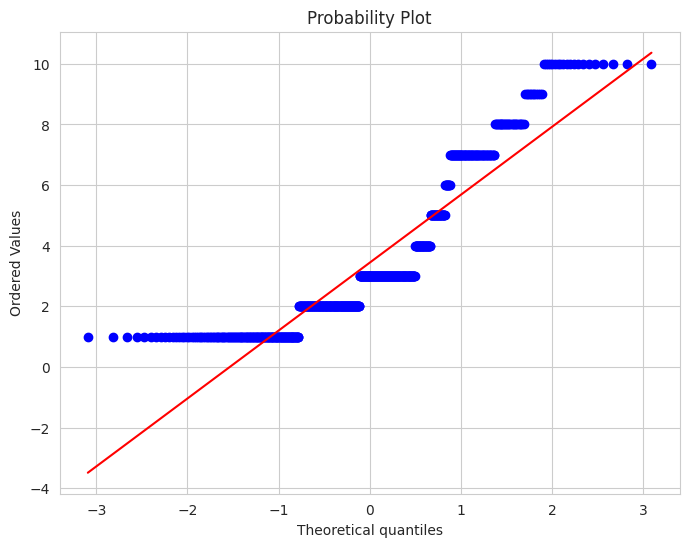

In [ ]:
sns.distplot(df['BlandChromatin'], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(df['BlandChromatin'], plot=plt);

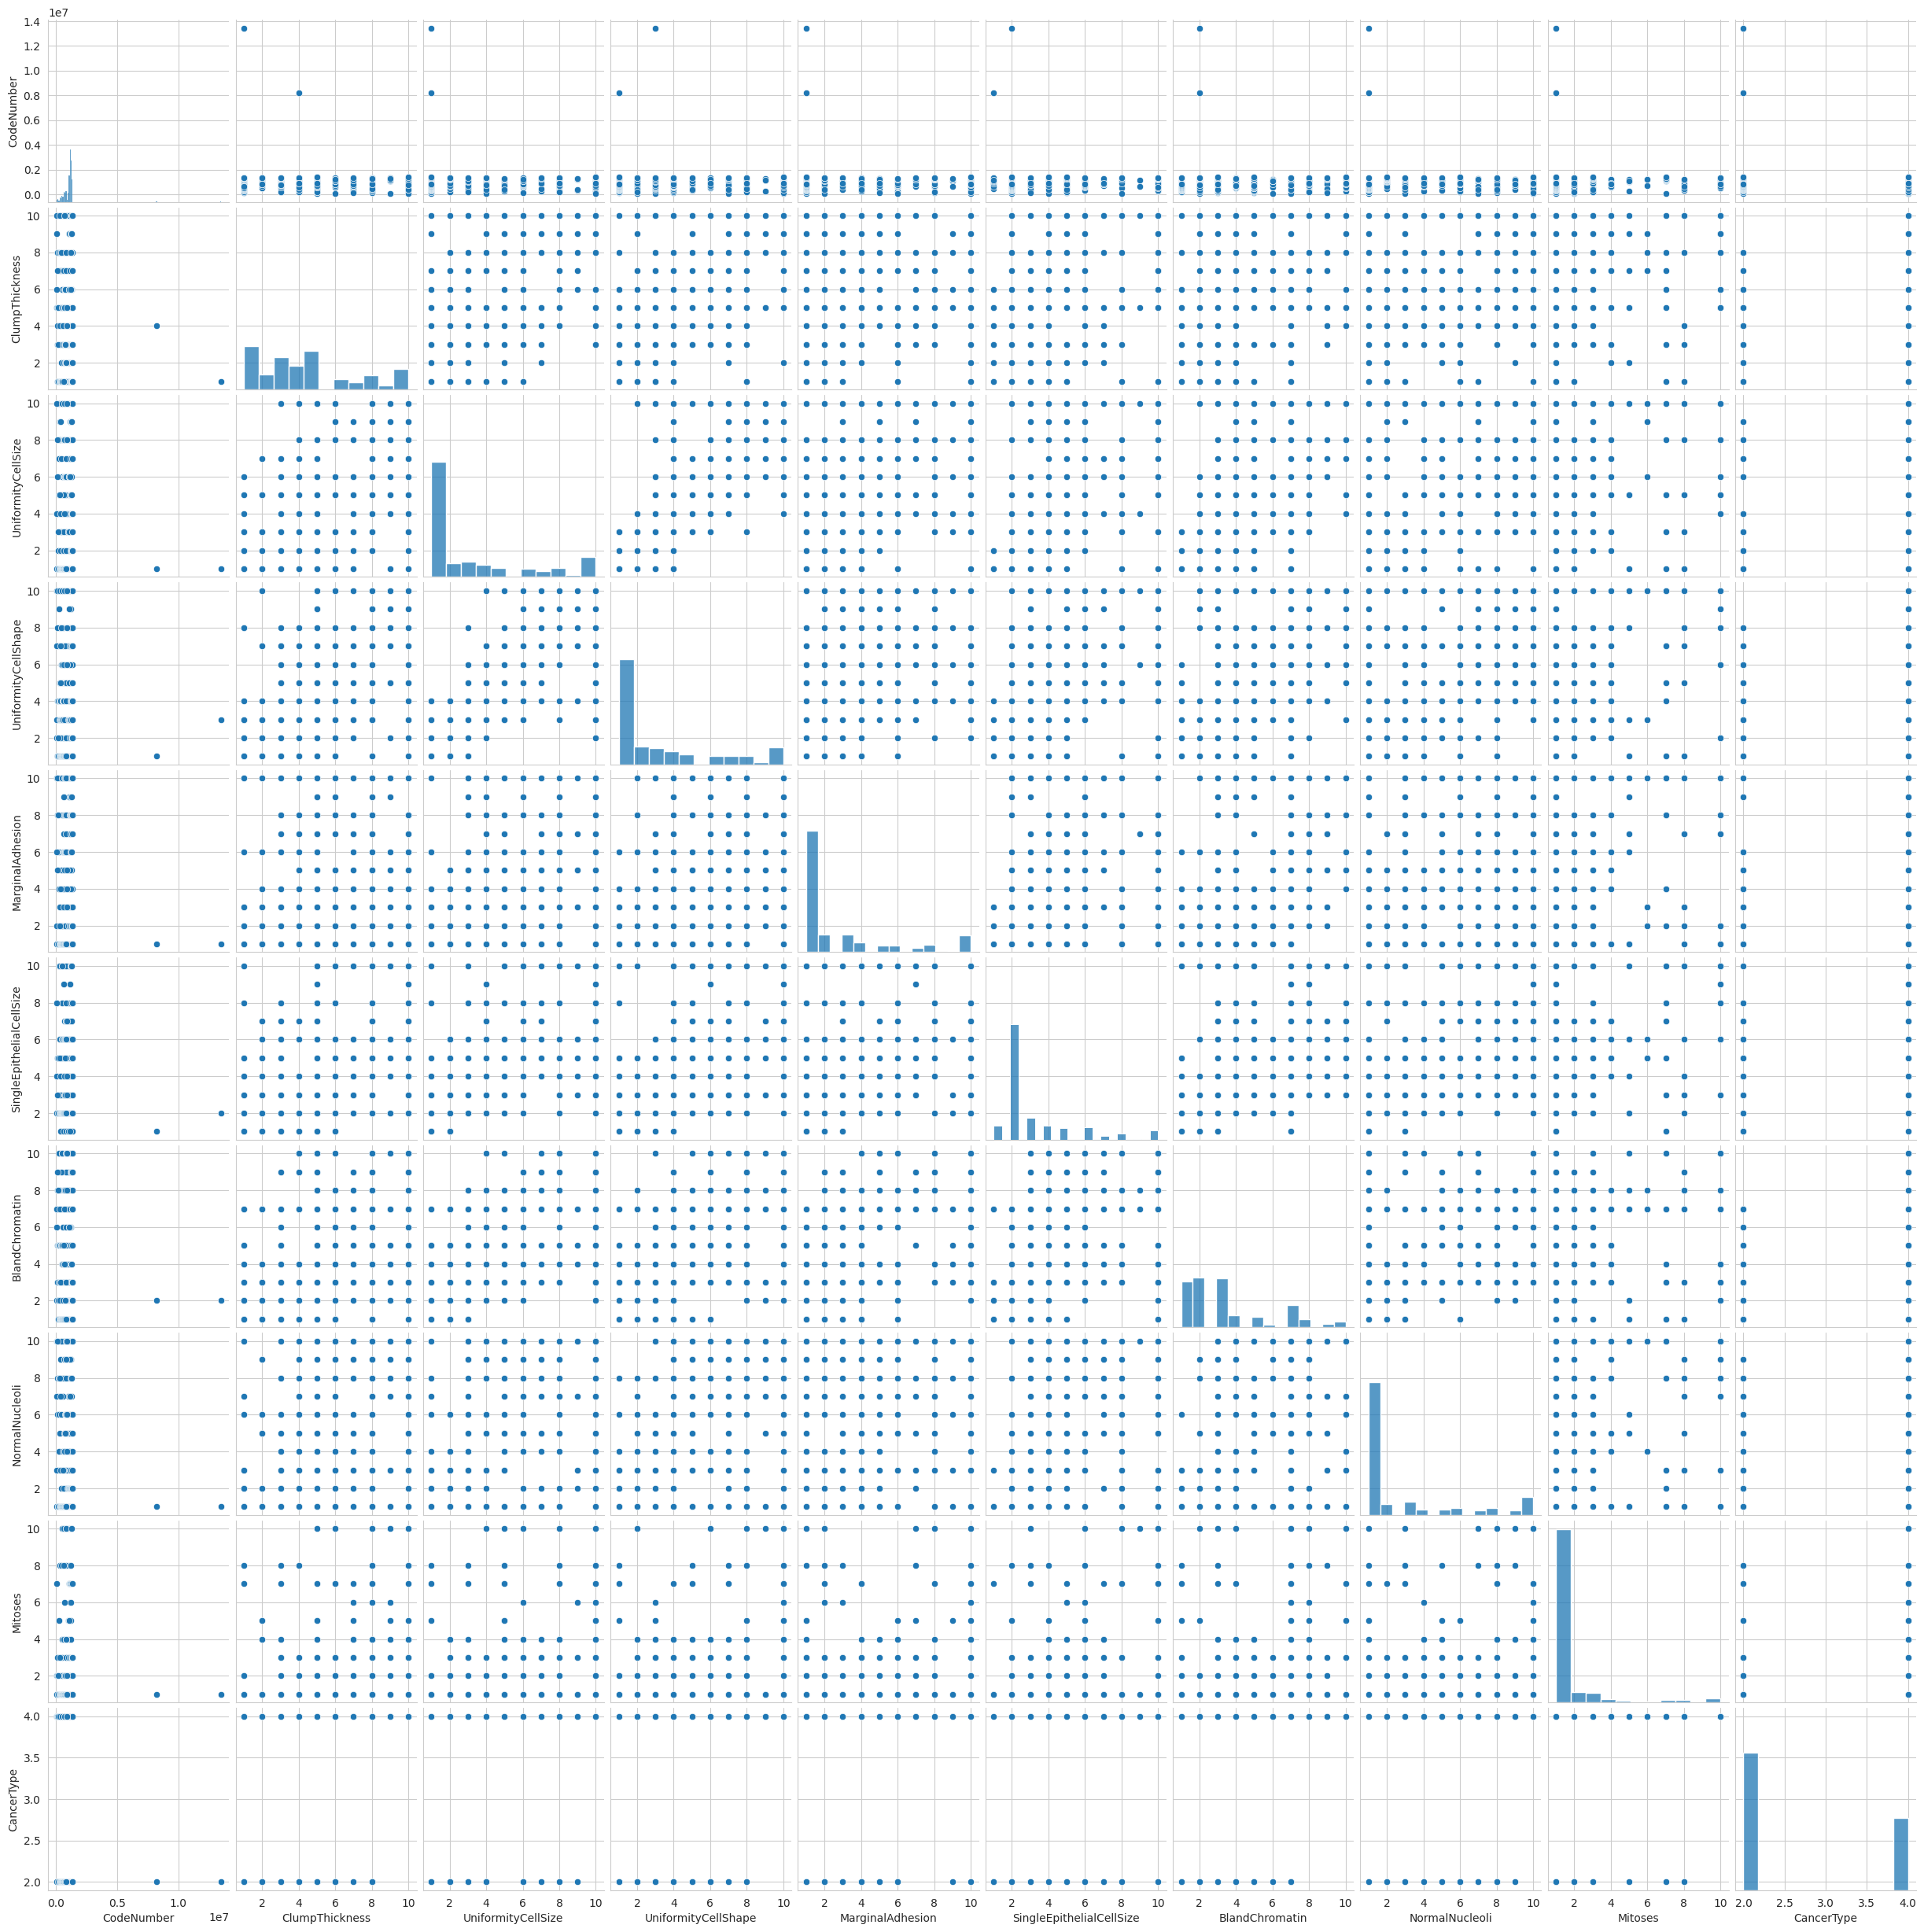

In [ ]:
sns.pairplot(df_compute);

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7375: FutureWarning: The default value of numeric_only will be `False` in a future version of Dask.
  assert isinstance(df, Series)


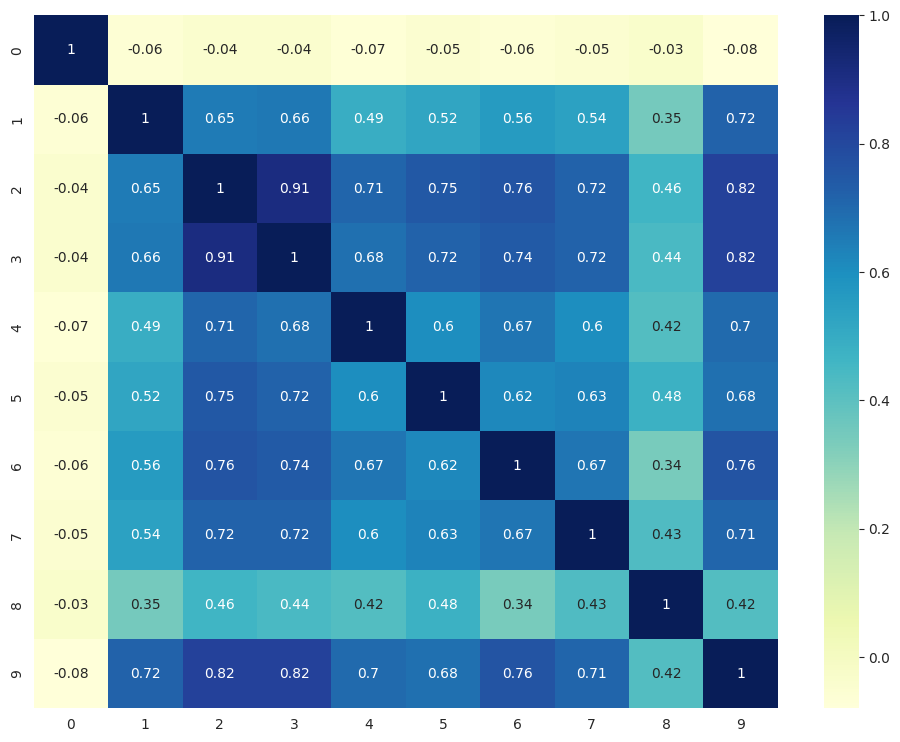

In [ ]:
plt.figure(figsize=(12, 9));
correlation_matrix =df.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

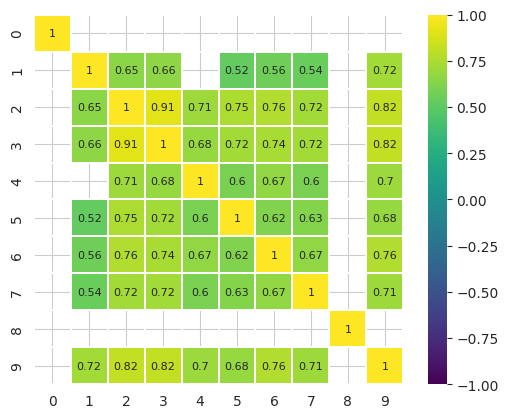

In [ ]:
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [36]:
from sklearn.cluster import KMeans
from joblib import parallel_backend
# Select only the numeric columns
df_numeric = df_compute.select_dtypes (include= ['number'])

# Or convert categorical columns into dummy variables
df_dummies = pd.get_dummies (df_compute)

# Then pass the modified dataframe to the KMeans algorithm
with parallel_backend ('dask'):
    km = KMeans (n_clusters=3)
    km.fit (df_numeric) # or df_dummies
    labels = km.predict (df_numeric) # or df_dummies
#I do not know why the dask_ml.cluster can not import
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 2
 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 0 0 0 0 0 0 